In [ ]:
#import relevant libraries
from bs4 import BeautifulSoup
import requests

In [ ]:
#Get movie list html from web page
html = requests.get("https://en.wikipedia.org/wiki/List_of_films_based_on_Marvel_Comics_publications")

#Convert to a beautiful soup object
soup = BeautifulSoup(html.content)

#search for the first table on the page
first_table = soup.find('table',{'class':'wikitable sortable'})

#extract all rows with movie title and URL
movie_list = first_table.find_all("i")
for movie in movie_list:
  print(movie)

<i><a href="/wiki/Howard_the_Duck_(film)" title="Howard the Duck (film)">Howard the Duck</a></i>
<i><a href="/wiki/Blade_(1998_film)" title="Blade (1998 film)">Blade</a></i>
<i><a href="/wiki/X-Men_(film)" title="X-Men (film)">X-Men</a></i>
<i><a href="/wiki/Blade_II" title="Blade II">Blade II</a></i>
<i><a href="/wiki/Spider-Man_(2002_film)" title="Spider-Man (2002 film)">Spider-Man</a></i>
<i><a href="/wiki/Daredevil_(film)" title="Daredevil (film)">Daredevil</a></i>
<i><a href="/wiki/X2_(film)" title="X2 (film)">X2</a></i>
<i><a href="/wiki/Hulk_(film)" title="Hulk (film)">Hulk</a></i>
<i><a href="/wiki/The_Punisher_(2004_film)" title="The Punisher (2004 film)">The Punisher</a></i>
<i><a href="/wiki/Spider-Man_2" title="Spider-Man 2">Spider-Man 2</a></i>
<i><a href="/wiki/Blade:_Trinity" title="Blade: Trinity">Blade: Trinity</a></i>
<i><a href="/wiki/Elektra_(2005_film)" title="Elektra (2005 film)">Elektra</a></i>
<i><a href="/wiki/Fantastic_Four_(2005_film)" title="Fantastic Four (

In [ ]:
#create function to extract movie details
def extract_movie_details(url):

  """
  This function takes in a url for a movie's wikipedia page, downloads
  the page, parses the html, locates the movie info box, then extracts
  all the movie's details into a dictionary

  """

  #extract web site content
  html = requests.get(url)

  #create a soup object with html data
  soup = BeautifulSoup(html.content,features='html.parser')

  #Removes all the superscript tags
  for tag in soup.find_all("sup"):
    tag.decompose()

  #find the info-box element
  info_box = soup.find('table',{'class':'infobox vevent'})

  #extract all rows from info box table
  rows = info_box.find_all('tr')

  #create empty dictionary to store movie info
  movie_info = {}

  #loop through every row
  for index,row in enumerate(rows):

    #retrieve movie title from first row
    if index == 0:
      movie_info["Title"] = row.find("th").getText()

    else:
      #check every other row for a header tag
      header = row.find('th')
      if header:
        #assign the <th> element as a dictionary key
        key = row.find('th').getText(" ")
        if row.find('td'):
          #assign <td> elements as the value
          value = row.find("td").getText(" ")
        else:
          #if it's  an <li> element, create list with all items and assign as the value
          value = [item.getText() for item in row.find_all('li')]

        #assign the value variable as the dictionary value
        movie_info[key] = value

  return movie_info

In [ ]:
#test function on another movie
extract_movie_details("https://en.wikipedia.org/wiki/X-Men_(film)")

{'Title': 'X-Men',
 'Directed by': 'Bryan Singer',
 'Screenplay by': 'David Hayter',
 'Story by': '\n Tom DeSanto \n Bryan Singer \n',
 'Based on': 'X-Men by  Stan Lee Jack Kirby',
 'Produced by': '\n Lauren Shuler Donner \n Ralph Winter \n',
 'Starring': '\n Patrick Stewart \n Hugh Jackman \n Ian McKellen \n Halle Berry \n Famke Janssen \n James Marsden \n Bruce Davison \n Rebecca Romijn-Stamos \n Ray Park \n Anna Paquin \n',
 'Cinematography': 'Newton Thomas Sigel',
 'Edited by': '\n Steven Rosenblum \n Kevin Stitt \n John Wright \n',
 'Music by': 'Michael Kamen',
 'Production companies': "\n Marvel Enterprises \n The Donners' Company \n Bad Hat Harry Productions \n",
 'Distributed by': '20th Century Fox',
 'Release dates': '\n July\xa012,\xa02000 \xa0( 2000-07-12 )  ( Ellis Island ) \n July\xa014,\xa02000 \xa0( 2000-07-14 )  (United States) \n',
 'Running time': '104 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$75 \xa0 million',
 'Box office': '$296.3 

In [ ]:
movie_list

[<i><a href="/wiki/Howard_the_Duck_(film)" title="Howard the Duck (film)">Howard the Duck</a></i>,
 <i><a href="/wiki/Blade_(1998_film)" title="Blade (1998 film)">Blade</a></i>,
 <i><a href="/wiki/X-Men_(film)" title="X-Men (film)">X-Men</a></i>,
 <i><a href="/wiki/Blade_II" title="Blade II">Blade II</a></i>,
 <i><a href="/wiki/Spider-Man_(2002_film)" title="Spider-Man (2002 film)">Spider-Man</a></i>,
 <i><a href="/wiki/Daredevil_(film)" title="Daredevil (film)">Daredevil</a></i>,
 <i><a href="/wiki/X2_(film)" title="X2 (film)">X2</a></i>,
 <i><a href="/wiki/Hulk_(film)" title="Hulk (film)">Hulk</a></i>,
 <i><a href="/wiki/The_Punisher_(2004_film)" title="The Punisher (2004 film)">The Punisher</a></i>,
 <i><a href="/wiki/Spider-Man_2" title="Spider-Man 2">Spider-Man 2</a></i>,
 <i><a href="/wiki/Blade:_Trinity" title="Blade: Trinity">Blade: Trinity</a></i>,
 <i><a href="/wiki/Elektra_(2005_film)" title="Elektra (2005 film)">Elektra</a></i>,
 <i><a href="/wiki/Fantastic_Four_(2005_film)

In [ ]:
import csv
import re

In [ ]:
# Open the CSV file in write mode
with open('movies.csv', mode='w', newline='') as file:
    writer = csv.writer(file)

    # Write the header row
    writer.writerow(['movie_name', 'link'])

    # Iterate over the movie_list
    for movie in movie_list:
        movie_name = movie.text
        link_suffix = re.search(r'href="([^"]+)"', str(movie))

        # Skip the movie if link_suffix is not found
        if link_suffix is None:
            continue

        link_suffix = link_suffix.group(1)
        link = f"https://en.wikipedia.org{link_suffix}"

        # Write the movie name and link to the CSV file
        writer.writerow([movie_name, link])

In [ ]:
# Open the existing CSV file in read mode
with open('movies.csv', mode='r', newline='') as file:
    reader = csv.reader(file)
    rows = list(reader)

# Add the "Starrings" header to the CSV file
rows[0].append("Starrings")

# Iterate over the rows (excluding the header) in the CSV file
for row in rows[1:]:
    movie_name = row[0]
    link = row[1]

    # Call the extract_movie_details function with the link
    movie_details = extract_movie_details(link)

    # Get the "Starring" data from the movie_details dictionary
    starrings = movie_details.get("Starring", "")

    # Add the "Starrings" data to the respective row in the CSV file
    row.append(starrings)

# Write the updated rows to the CSV file
with open('movies.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

In [ ]:
# Open the existing CSV file in read mode
with open('movies.csv', mode='r', newline='') as file:
    reader = csv.reader(file)
    rows = list(reader)

# Add the "Starrings" header to the CSV file
rows[0].append("Box office")

# Iterate over the rows (excluding the header) in the CSV file
for row in rows[1:]:
    movie_name = row[0]
    link = row[1]

    # Call the extract_movie_details function with the link
    movie_details = extract_movie_details(link)

    # Get the "Starring" data from the movie_details dictionary
    box_office = movie_details.get("Box office", "")

    # Add the "Starrings" data to the respective row in the CSV file
    row.append(box_office)

# Write the updated rows to the CSV file
with open('movies.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

In [ ]:
# Open the existing CSV file in read mode
with open('movies.csv', mode='r', newline='') as file:
    reader = csv.reader(file)
    rows = list(reader)

# Add the "Starrings" header to the CSV file
rows[0].append("Budget")

# Iterate over the rows (excluding the header) in the CSV file
for row in rows[1:]:
    movie_name = row[0]
    link = row[1]

    # Call the extract_movie_details function with the link
    movie_details = extract_movie_details(link)

    # Get the "Starring" data from the movie_details dictionary
    budget = movie_details.get("Budget", "")

    # Add the "Starrings" data to the respective row in the CSV file
    row.append(budget)

# Write the updated rows to the CSV file
with open('movies.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

In [ ]:
# Open the existing CSV file in read mode
with open('movies.csv', mode='r', newline='') as file:
    reader = csv.reader(file)
    rows = list(reader)

# Add the "Time" header to the CSV file
rows[0].append("Time")

# Iterate over the rows (excluding the header) in the CSV file
for row in rows[1:]:
    movie_name = row[0]
    link = row[1]

    # Call the extract_movie_details function with the link
    movie_details = extract_movie_details(link)

    # Get the "Starring" data from the movie_details dictionary
    box_office = movie_details.get("Running time", "")

    # Add the "Starrings" data to the respective row in the CSV file
    row.append(box_office)

# Write the updated rows to the CSV file
with open('movies.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

In [ ]:
import pandas as pd

# Read the CSV file into a dataframe
df = pd.read_csv('movies.csv')


In [ ]:
rows_lol = []

# Find all `tr` tags
data_rows = first_table.find_all('tr')

for row in data_rows:
    value = row.find_all('td')
    beautified_value = [ele.text.strip() for ele in value]
    # Remove data arrays that are empty
    if len(beautified_value) == 0:
        continue
    rows_lol.append(beautified_value)

print(rows_lol)

movie_years = {}
last_year = None
for item in rows_lol:
    if item[0].isdigit():
        last_year = int(item[0])
    if last_year is not None:
        if len(item) > 1:   # make sure there is a movie title to get
            movie = item[1]
            movie_years[movie] = last_year


df['Year'] = df['movie_name'].map(movie_years)
df['Year'] = df['Year'].fillna(method='ffill')



[['1986', 'Howard the Duck', 'Universal Pictures', 'Co-produced by Lucasfilm'], ['1998', 'Blade', 'New Line Cinema', ''], ['2000', 'X-Men', '20th Century Fox'], ['2002', 'Blade II', 'New Line Cinema'], ['Spider-Man', 'Columbia Pictures', 'Nominated for 2 Oscars'], ['2003', 'Daredevil', '20th Century Fox', 'Co-produced by Regency Enterprises'], ['X2', ''], ['Hulk', 'Universal Pictures'], ['2004', 'The Punisher', 'Artisan Entertainment', 'Distributed by Lionsgate Films in the U.S. and Canada and Columbia Pictures in other territories'], ['Spider-Man 2', 'Columbia Pictures', 'Won 1 Oscar, nominated for 2 more'], ['Blade: Trinity', 'New Line Cinema', ''], ['2005', 'Elektra', '20th Century Fox', 'Co-produced by Regency Enterprises'], ['Fantastic Four', ''], ['2006', 'X-Men: The Last Stand'], ['2007', 'Ghost Rider', 'Columbia Pictures'], ['Spider-Man 3'], ['Fantastic Four: Rise of the Silver Surfer', '20th Century Fox'], ['2008', 'Iron Man', 'Marvel Studios', 'Distributed by Paramount Pictur

In [ ]:
import re
from bs4 import BeautifulSoup
import requests

# Get movie list html from web page
html = requests.get("https://en.wikipedia.org/wiki/List_of_films_based_on_Marvel_Comics_publications")

# Convert to a beautiful soup object
soup = BeautifulSoup(html.content, 'html.parser')

# Search for all tables on the page
tables = soup.find_all('table', {'class': 'wikitable'})

# Select the desired table
critic_table = tables[-3]

# Find all rows in the table
rows = critic_table.find_all('tr')

# A dictionary to hold movie-score pairs
movie_scores = {}

# Loop through each row
for row in rows:
    # Try to find the movie name and score within the row
    movie_tag = row.find('i')
    score_tag = row.find('td')

    # If either the movie name or score is missing, skip this row
    if movie_tag is None or score_tag is None:
        continue

    # Get the movie name
    movie_name = movie_tag.text.strip()

    # Get the score and remove the '%' sign
    score = score_tag.text.strip().split('%')[0]

    # Add the movie and score to our dictionary
    movie_scores[movie_name] = score

# Print each movie and its score
for movie, score in movie_scores.items():
    print(f"{movie}: {score}%")


Howard the Duck: 14%
The Punisher: 29%
Captain America: 13%
The Fantastic Four: 27%
Blade: 57%
X-Men: 82%
Blade II: 58%
Spider-Man: 90%
Daredevil: 43%
X2: 85%
Hulk: 62%
Spider-Man 2: 93%
Blade: Trinity: 25%
Elektra: 11%
Man-Thing: 17%
Fantastic Four: 9%
X-Men: The Last Stand: 57%
Ghost Rider: 26%
Spider-Man 3: 63%
Fantastic Four: Rise of the Silver Surfer: 37%
Iron Man: 94%
The Incredible Hulk: 67%
Punisher: War Zone: 29%
X-Men Origins: Wolverine: 38%
Iron Man 2: 71%
Thor: 77%
X-Men: First Class: 86%
Captain America: The First Avenger: 80%
Ghost Rider: Spirit of Vengeance: 18%
Marvel's The Avengers: 91%
The Amazing Spider-Man: 71%
Iron Man 3: 79%
The Wolverine: 71%
Thor: The Dark World: 66%
Captain America: The Winter Soldier: 90%
The Amazing Spider-Man 2: 51%
X-Men: Days of Future Past: 90%
Guardians of the Galaxy: 92%
Big Hero 6: 90%
Avengers: Age of Ultron: 76%
Ant-Man: 83%
Deadpool: 85%
Captain America: Civil War: 90%
X-Men: Apocalypse: 47%
Doctor Strange: 89%
Logan: 94%
Guardians 

In [ ]:
df.head(10)

movie_name                                               link  \
0  Howard the Duck  https://en.wikipedia.org/wiki/Howard_the_Duck_...   
1            Blade    https://en.wikipedia.org/wiki/Blade_(1998_film)   
2            X-Men         https://en.wikipedia.org/wiki/X-Men_(film)   
3         Blade II             https://en.wikipedia.org/wiki/Blade_II   
4       Spider-Man  https://en.wikipedia.org/wiki/Spider-Man_(2002...   
5        Daredevil     https://en.wikipedia.org/wiki/Daredevil_(film)   
6               X2            https://en.wikipedia.org/wiki/X2_(film)   
7             Hulk          https://en.wikipedia.org/wiki/Hulk_(film)   
8     The Punisher  https://en.wikipedia.org/wiki/The_Punisher_(20...   
9     Spider-Man 2         https://en.wikipedia.org/wiki/Spider-Man_2   

                                           Starrings        Box office  \
0  \n Lea Thompson \n Jeffrey Jones \n Tim Robbin...       $38 million   
1  \n Wesley Snipes \n Stephen Dorff \n Kris Kris...    $131.2 million   
2  \n Patrick Stewart \n Hugh Jackman \n Ian McKe...  $296.3   million   
3  \n Wesley Snipes \n Kris Kristofferson \n Ron ...      $155 million   
4  \n Tobey Maguire \n Willem Dafoe \n Kirsten Du...      $825 million   
5  \n Ben Affleck \n Jennifer Garner \n Michael C...    $179.2 million   
6  \n Patrick Stewart \n Hugh Jackman \n Ian McKe...  $407.7   million   
7  \n Eric Bana \n Jennifer Connelly \n Sam Ellio...    $245.4 million   
8  \n Thomas Jane \n John Travolta \n Will Patton...     $54.7 million   
9  \n Tobey Maguire \n Kirsten Dunst \n James Fra...      $789 million   

               Budget         Time    Year  
0      $30–37 million  111 minutes  1986.0  
1         $45 million  120 minutes  1998.0  
2       $75   million  104 minutes  2000.0  
3         $54 million  117 minutes  2002.0  
4        $139 million  121 minutes  2002.0  
5         $78 million  103 minutes  2003.0  
6  $110–125   million  134 minutes  2003.0  
7        $137 million  138 minutes  2003.0  
8         $33 million  123 minutes  2004.0  
9        $200 million  127 minutes  2004.0

In [ ]:
df.tail()

movie_name  \
68                 Kraven the Hunter   
69                       The Marvels   
70                        Madame Web   
71  Captain America: Brave New World   
72                        Deadpool 3   

                                                 link  \
68  https://en.wikipedia.org/wiki/Kraven_the_Hunte...   
69          https://en.wikipedia.org/wiki/The_Marvels   
70    https://en.wikipedia.org/wiki/Madame_Web_(film)   
71  https://en.wikipedia.org/wiki/Captain_America:...   
72           https://en.wikipedia.org/wiki/Deadpool_3   

                                            Starrings Box office Budget Time  \
68  \n Aaron Taylor-Johnson \n Ariana DeBose \n Ru...        NaN    NaN  NaN   
69  \n Brie Larson \n Teyonah Parris \n Iman Vella...        NaN    NaN  NaN   
70             \n Dakota Johnson \n Sydney Sweeney \n        NaN    NaN  NaN   
71  \n Anthony Mackie \n Danny Ramirez \n Carl Lum...        NaN    NaN  NaN   
72  \n Ryan Reynolds \n Hugh Jackman \n Morena Bac...        NaN    NaN  NaN   

      Year  
68  2023.0  
69  2023.0  
70  2024.0  
71  2024.0  
72  2024.0

In [ ]:
df = df.dropna()

In [ ]:
# Create a new dataframe from the movie_scores dictionary
scores_df = pd.DataFrame(list(movie_scores.items()), columns=['movie_name', 'score'])

# Convert score column to integer
scores_df['score'] = scores_df['score'].astype(int)

# Merge df and scores_df on the movie_name column
df = pd.merge(df, scores_df, on='movie_name', how='left')


In [ ]:
df.tail()

movie_name  \
63  Doctor Strange in the Multiverse of Madness   
64                       Thor: Love and Thunder   
65               Black Panther: Wakanda Forever   
66            Ant-Man and the Wasp: Quantumania   
67               Guardians of the Galaxy Vol. 3   

                                                 link  \
63  https://en.wikipedia.org/wiki/Doctor_Strange_i...   
64  https://en.wikipedia.org/wiki/Thor:_Love_and_T...   
65  https://en.wikipedia.org/wiki/Black_Panther:_W...   
66  https://en.wikipedia.org/wiki/Ant-Man_and_the_...   
67  https://en.wikipedia.org/wiki/Guardians_of_the...   

                                            Starrings      Box office  \
63  \n Benedict Cumberbatch \n Elizabeth Olsen \n ...  $955.8 million   
64  \n Chris Hemsworth \n Christian Bale \n Tessa ...  $760.9 million   
65  \n Letitia Wright \n Lupita Nyong'o \n Danai G...  $859.2 million   
66  \n Paul Rudd \n Evangeline Lilly \n Jonathan M...  $476.1 million   
67  \n Chris Pratt \n Zoe Saldaña \n Dave Bautista...  $805.9 million   

              Budget         Time    Year  score  
63  $172–200 million  126 minutes  2022.0   74.0  
64      $250 million  119 minutes  2022.0   63.0  
65  $200–250 million  161 minutes  2022.0   84.0  
66      $200 million  124 minutes  2023.0   46.0  
67      $250 million  150 minutes  2023.0   82.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie_name  68 non-null     object 
 1   link        68 non-null     object 
 2   Starrings   68 non-null     object 
 3   Box office  68 non-null     object 
 4   Budget      68 non-null     object 
 5   Time        68 non-null     object 
 6   Year        68 non-null     float64
 7   score       66 non-null     float64
dtypes: float64(2), object(6)
memory usage: 4.8+ KB


In [ ]:

# Remove non-numeric characters and convert 'Box office' column to numeric
df['Box office'] = df['Box office'].str.replace(r'[\$,]', '').str.extract(r'(\d+\.?\d*)').astype(float)

# Multiply values less than 5 by 1000
df.loc[df['Box office'] < 5, 'Box office'] *= 1000

# Remove non-numeric characters and convert 'Budget' column to numeric
df['Budget'] = df['Budget'].str.replace(r'[\$,]', '').str.extract(r'(\d+\.?\d*)').astype(float)

df['Year'] = df['Year'].astype(int)
df['Time'] = df['Time'].str.extract('(\d+)').astype(int)




<ipython-input-19-533a3f357a50>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Box office'] = df['Box office'].str.replace(r'[\$,]', '').str.extract(r'(\d+\.?\d*)').astype(float)
<ipython-input-19-533a3f357a50>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Budget'] = df['Budget'].str.replace(r'[\$,]', '').str.extract(r'(\d+\.?\d*)').astype(float)


In [ ]:
df.head()

movie_name                                               link  \
0  Howard the Duck  https://en.wikipedia.org/wiki/Howard_the_Duck_...   
1            Blade    https://en.wikipedia.org/wiki/Blade_(1998_film)   
2            X-Men         https://en.wikipedia.org/wiki/X-Men_(film)   
3         Blade II             https://en.wikipedia.org/wiki/Blade_II   
4       Spider-Man  https://en.wikipedia.org/wiki/Spider-Man_(2002...   

                                           Starrings  Box office  Budget  \
0  \n Lea Thompson \n Jeffrey Jones \n Tim Robbin...        38.0    30.0   
1  \n Wesley Snipes \n Stephen Dorff \n Kris Kris...       131.2    45.0   
2  \n Patrick Stewart \n Hugh Jackman \n Ian McKe...       296.3    75.0   
3  \n Wesley Snipes \n Kris Kristofferson \n Ron ...       155.0    54.0   
4  \n Tobey Maguire \n Willem Dafoe \n Kirsten Du...       825.0   139.0   

   Time  Year  score  
0   111  1986   14.0  
1   120  1998   57.0  
2   104  2000   82.0  
3   117  2002   58.0  
4   121  2002   90.0

In [ ]:
df.rename(columns={'Time': 'Time (in minutes)'}, inplace=True)
df.rename(columns={'Budget': 'Budget (in Million Dollars)'}, inplace=True)
df.rename(columns={'Box office': 'Box office (in Million Dollars)'}, inplace=True)
df.rename(columns={'score': 'Critic Score (from Rotten Tomatoes)'}, inplace=True)
df.rename(columns={'Year': 'Release Date'}, inplace=True)


In [ ]:
df.tail()

movie_name  \
63  Doctor Strange in the Multiverse of Madness   
64                       Thor: Love and Thunder   
65               Black Panther: Wakanda Forever   
66            Ant-Man and the Wasp: Quantumania   
67               Guardians of the Galaxy Vol. 3   

                                                 link  \
63  https://en.wikipedia.org/wiki/Doctor_Strange_i...   
64  https://en.wikipedia.org/wiki/Thor:_Love_and_T...   
65  https://en.wikipedia.org/wiki/Black_Panther:_W...   
66  https://en.wikipedia.org/wiki/Ant-Man_and_the_...   
67  https://en.wikipedia.org/wiki/Guardians_of_the...   

                                            Starrings  \
63  \n Benedict Cumberbatch \n Elizabeth Olsen \n ...   
64  \n Chris Hemsworth \n Christian Bale \n Tessa ...   
65  \n Letitia Wright \n Lupita Nyong'o \n Danai G...   
66  \n Paul Rudd \n Evangeline Lilly \n Jonathan M...   
67  \n Chris Pratt \n Zoe Saldaña \n Dave Bautista...   

    Box office (in Million Dollars)  Budget (in Million Dollars)  \
63                            955.8                        172.0   
64                            760.9                        250.0   
65                            859.2                        200.0   
66                            476.1                        200.0   
67                            805.9                        250.0   

    Time (in minutes)  Release Date  Critic Score (from Rotten Tomatoes)  
63                126          2022                                 74.0  
64                119          2022                                 63.0  
65                161          2022                                 84.0  
66                124          2023                                 46.0  
67                150          2023                                 82.0

In [ ]:
df[df.movie_name == "Iron Man 3"]

movie_name                                      link  \
28  Iron Man 3  https://en.wikipedia.org/wiki/Iron_Man_3   

                                            Starrings  \
28  \n Robert Downey Jr. \n Gwyneth Paltrow \n Don...   

    Box office (in Million Dollars)  Budget (in Million Dollars)  \
28                           1215.0                        200.0   

    Time (in minutes)  Release Date  Critic Score (from Rotten Tomatoes)  
28                131          2013                                 79.0

In [ ]:
df['Starrings'] = df['Starrings'].apply(lambda x: x.split('\n'))
df['Starrings'] = df['Starrings'].apply(lambda x: [actor.strip() for actor in x])
df.head()

movie_name                                               link  \
0  Howard the Duck  https://en.wikipedia.org/wiki/Howard_the_Duck_...   
1            Blade    https://en.wikipedia.org/wiki/Blade_(1998_film)   
2            X-Men         https://en.wikipedia.org/wiki/X-Men_(film)   
3         Blade II             https://en.wikipedia.org/wiki/Blade_II   
4       Spider-Man  https://en.wikipedia.org/wiki/Spider-Man_(2002...   

                                           Starrings  \
0     [, Lea Thompson, Jeffrey Jones, Tim Robbins, ]   
1  [, Wesley Snipes, Stephen Dorff, Kris Kristoff...   
2  [, Patrick Stewart, Hugh Jackman, Ian McKellen...   
3  [, Wesley Snipes, Kris Kristofferson, Ron Perl...   
4  [, Tobey Maguire, Willem Dafoe, Kirsten Dunst,...   

   Box office (in Million Dollars)  Budget (in Million Dollars)  \
0                             38.0                         30.0   
1                            131.2                         45.0   
2                            296.3                         75.0   
3                            155.0                         54.0   
4                            825.0                        139.0   

   Time (in minutes)  Release Date  Critic Score (from Rotten Tomatoes)  
0                111          1986                                 14.0  
1                120          1998                                 57.0  
2                104          2000                                 82.0  
3                117          2002                                 58.0  
4                121          2002                                 90.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   movie_name                           68 non-null     object 
 1   link                                 68 non-null     object 
 2   Starrings                            68 non-null     object 
 3   Box office (in Million Dollars)      68 non-null     float64
 4   Budget (in Million Dollars)          68 non-null     float64
 5   Time (in minutes)                    68 non-null     int64  
 6   Release Date                         68 non-null     int64  
 7   Critic Score (from Rotten Tomatoes)  66 non-null     float64
dtypes: float64(3), int64(2), object(3)
memory usage: 4.8+ KB


In [ ]:
for index, row in df.iterrows():
  date = row['Release Date']
  box_office = row['Box office (in Million Dollars)']
  score = row['Critic Score (from Rotten Tomatoes)']
  budget = row['Budget (in Million Dollars)']
  success =100*box_office/budget
  if 200 < budget < 300:
    print(row)
    print("Success Rate:",success)

movie_name                                                         X-Men: The Last Stand
link                                   https://en.wikipedia.org/wiki/X-Men:_The_Last_...
Starrings                              [, Hugh Jackman, Halle Berry, Ian McKellen, Fa...
Box office (in Million Dollars)                                                    460.4
Budget (in Million Dollars)                                                        210.0
Time (in minutes)                                                                    104
Release Date                                                                        2006
Critic Score (from Rotten Tomatoes)                                                 57.0
Name: 13, dtype: object
Success Rate 219.23809523809524
movie_name                                                                  Spider-Man 3
link                                          https://en.wikipedia.org/wiki/Spider-Man_3
Starrings                              [, Tobey Maguir

### GRAPH KISMI

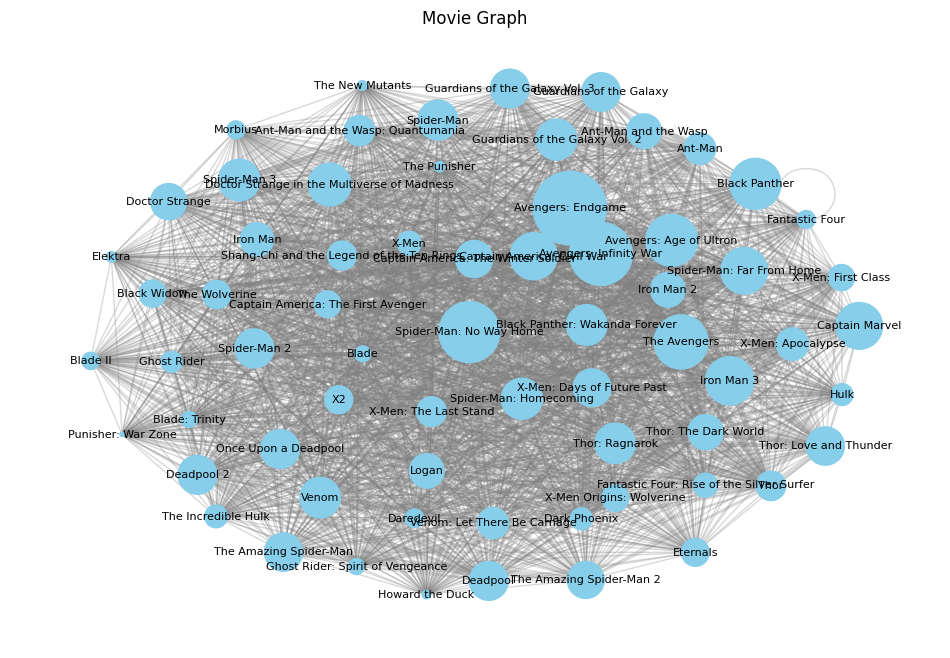

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

# Add nodes with movie titles and node sizes as box office
for index, row in df.iterrows():
    movie_title = row['movie_name']
    box_office = row['Box office (in Million Dollars)']
    G.add_node(movie_title, size=box_office)

# Calculate edge weights based on common actors and add edges to the graph
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        actors1 = set(df.loc[i, 'Starrings'])
        actors2 = set(df.loc[j, 'Starrings'])
        common_actors = actors1.intersection(actors2)
        edge_weight = len(common_actors)
        if edge_weight > 0:
            G.add_edge(df.loc[i, 'movie_name'], df.loc[j, 'movie_name'], weight=edge_weight)

# Get node sizes and edge weights
node_sizes = [G.nodes[node]['size'] for node in G.nodes()]
edge_weights = [G.edges[edge]['weight'] for edge in G.edges()]

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.3, iterations=50)  # Layout the graph nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='gray', alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title('Movie Graph')
plt.axis('off')
plt.show()


#nx.write_gexf(G, 'marvel_movies_network.gexf')
#files.download("marvel_movies_network.gexf")

In [ ]:
# Create an empty graph
import networkx as nx
G = nx.Graph()

# Add nodes with movie titles and node sizes as box office
for index, row in df.iterrows():
    movie_title = row['movie_name']
    box_office = row['Box office (in Million Dollars)']
    G.add_node(movie_title, size=box_office)

# Calculate edge weights based on common actors and add edges to the graph
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        actors1 = set(df.loc[i, 'Starrings'])
        actors2 = set(df.loc[j, 'Starrings'])
        common_actors = actors1.intersection(actors2)
        edge_weight = len(common_actors)
        if edge_weight > 0:
            G.add_edge(df.loc[i, 'movie_name'], df.loc[j, 'movie_name'], weight=edge_weight)



In [ ]:
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Print the closeness centrality and betweenness centrality for each node
for node in G.nodes():
    print(f"Node: {node}")
    print(f"Closeness Centrality: {closeness_centrality[node]}")
    print(f"Betweenness Centrality: {betweenness_centrality[node]}")
    print()


Node: Howard the Duck
Closeness Centrality: 1.0
Betweenness Centrality: 0.0

Node: Blade
Closeness Centrality: 1.0
Betweenness Centrality: 0.0

Node: X-Men
Closeness Centrality: 1.0
Betweenness Centrality: 0.0

Node: Blade II
Closeness Centrality: 1.0
Betweenness Centrality: 0.0

Node: Spider-Man
Closeness Centrality: 1.0
Betweenness Centrality: 0.0

Node: Daredevil
Closeness Centrality: 1.0
Betweenness Centrality: 0.0

Node: X2
Closeness Centrality: 1.0
Betweenness Centrality: 0.0

Node: Hulk
Closeness Centrality: 1.0
Betweenness Centrality: 0.0

Node: The Punisher
Closeness Centrality: 1.0
Betweenness Centrality: 0.0

Node: Spider-Man 2
Closeness Centrality: 1.0
Betweenness Centrality: 0.0

Node: Blade: Trinity
Closeness Centrality: 1.0
Betweenness Centrality: 0.0

Node: Elektra
Closeness Centrality: 1.0
Betweenness Centrality: 0.0

Node: Fantastic Four
Closeness Centrality: 1.0
Betweenness Centrality: 0.0

Node: X-Men: The Last Stand
Closeness Centrality: 1.0
Betweenness Centrality:

Closeness Centrality:
The closeness centrality of a node measures how close it is, on average, to all other nodes in the network. It quantifies how quickly and efficiently information can spread from that node to other nodes in the network. Nodes with high closeness centrality are considered more central because they can quickly reach other nodes and have faster access to information. In the context of your movie graph, the closeness centrality of a movie node indicates how easily the information related to that movie can reach other movies in terms of shared actors.

Betweenness Centrality:
The betweenness centrality of a node quantifies the extent to which a node lies on the shortest paths between other pairs of nodes in the network. It measures the node's ability to facilitate communication, information flow, or influence between other nodes. Nodes with high betweenness centrality act as bridges or connectors between different parts of the network. In your movie graph, the betweenness centrality of a movie node indicates its importance in connecting different movies through shared actors. Movies with high betweenness centrality play a significant role in the flow of information or influence within the network.



In [ ]:
nx.number_connected_components(G)


1

In [ ]:
# BU DEĞİL YAZDIĞIM ÜSTTEKİLERE BAK
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files




"""budget_threshold = 10  #Valueyla oynayabilirsin
edges = []
for i, row_i in df.iterrows():
    for j, row_j in df.iterrows():
        if i < j:
            weight = abs(row_i['Budget (in Million Dollars)']'] - row_j['Budget (in Million Dollars)']'])
            if 0 < weight <= budget_threshold:
                edges.append((row_i['film'], row_j['film'], weight))


G = nx.Graph()
G.add_weighted_edges_from(edges)

worldwide_gross = df.set_index('film')['worldwide gross ($m)'].to_dict()
nx.set_node_attributes(G, worldwide_gross, 'worldwide_gross')

pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=[worldwide_gross[n]*5 for n in G.nodes()])
nx.draw(G, pos, with_labels=True, node_size=[worldwide_gross[n]*5 for n in G.nodes()])


nx.write_gexf(G, 'marvel_movies_network.gexf')
#files.download("marvel_movies_network.gexf")"""

'budget_threshold = 10  #Valueyla oynayabilirsin\nedges = []\nfor i, row_i in df.iterrows():\n    for j, row_j in df.iterrows():\n        if i < j:\n            weight = abs(row_i[\'Budget (in Million Dollars)\']\'] - row_j[\'Budget (in Million Dollars)\']\'])\n            if 0 < weight <= budget_threshold:\n                edges.append((row_i[\'film\'], row_j[\'film\'], weight))\n\n\nG = nx.Graph()\nG.add_weighted_edges_from(edges)\n\nworldwide_gross = df.set_index(\'film\')[\'worldwide gross ($m)\'].to_dict()\nnx.set_node_attributes(G, worldwide_gross, \'worldwide_gross\')\n\npos = nx.spring_layout(G, seed=42)\nnx.draw(G, pos, with_labels=True, node_size=[worldwide_gross[n]*5 for n in G.nodes()])\nnx.draw(G, pos, with_labels=True, node_size=[worldwide_gross[n]*5 for n in G.nodes()])\n\n\nnx.write_gexf(G, \'marvel_movies_network.gexf\')\n#files.download("marvel_movies_network.gexf")'

In [ ]:
import statsmodels.api as sm
G = nx.Graph()
from google.colab import files
# Add nodes with movie titles and node sizes as box office
for index, row in df.iterrows():
    movie_title = row['movie_name']
    box_office = row['Box office (in Million Dollars)']
    score = row['Critic Score (from Rotten Tomatoes)']
    budget = row['Budget (in Million Dollars)']
    G.add_node(movie_title, size=100*score*box_office/budget)

# Calculate edge weights based on common actors and add edges to the graph

common_actors_threshold = 4  #OYNAYABİLİRSİN BUNLA
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        actors1 = set(df.loc[i, 'Starrings'])
        actors2 = set(df.loc[j, 'Starrings'])
        common_actors = actors1.intersection(actors2)
        edge_weight = len(common_actors)
        if edge_weight >= common_actors_threshold:
            G.add_edge(df.loc[i, 'movie_name'], df.loc[j, 'movie_name'], weight=edge_weight)

# Get node sizes and edge weights
node_sizes = [G.nodes[node]['size'] for node in G.nodes()]                                                                      ###############################     AKTOR TRESHOLDLU KOD    #####################################
edge_weights = [G.edges[edge]['weight'] for edge in G.edges()]

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.15, iterations=50)  # Adjust k to control the distance between nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='gray', alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title('Movie Graph')
plt.axis('off')
plt.show()

closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
degree_centrality = nx.degree_centrality(G)
clustering_coefficient = nx.clustering(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Print the centrality measures for each node
for node in G.nodes():
    print(f"Node: {node}")
    print(f"Closeness Centrality: {closeness_centrality[node]}")
    print(f"Betweenness Centrality: {betweenness_centrality[node]}")
    print(f"Degree Centrality: {degree_centrality[node]}")
    print(f"Clustering Coefficient: {clustering_coefficient[node]}")
    print(f"Eigenvector Centrality: {eigenvector_centrality[node]}")
    print()
    '''
# Perform regression analysis
X = df[['Starrings']]  # Use budget as the independent variable
y = df['Box office (in Million Dollars)']  # Use box office as the dependent variable
X = sm.add_constant(X)  # Add a constant term to the independent variable

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

# Perform hypothesis test on the regression coefficient
coef = results.params['Budget (in Million Dollars)']
p_value = results.pvalues['Budget (in Million Dollars)']

print('Regression coefficient:', coef)
print('p-value:', p_value)

closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Print the closeness centrality and betweenness centrality for each node
for node in G.nodes():
    print(f"Node: {node}")
    print(f"Closeness Centrality: {closeness_centrality[node]}")
    print(f"Betweenness Centrality: {betweenness_centrality[node]}")
    print()

nx.write_gexf(G, 'marvel_movies_network.gexf')
files.download("marvel_movies_network.gexf")
'''

nx.write_gexf(G, "starrings_4.gexf")
#files.download("starrings_4.gexf")


NameError: ignored

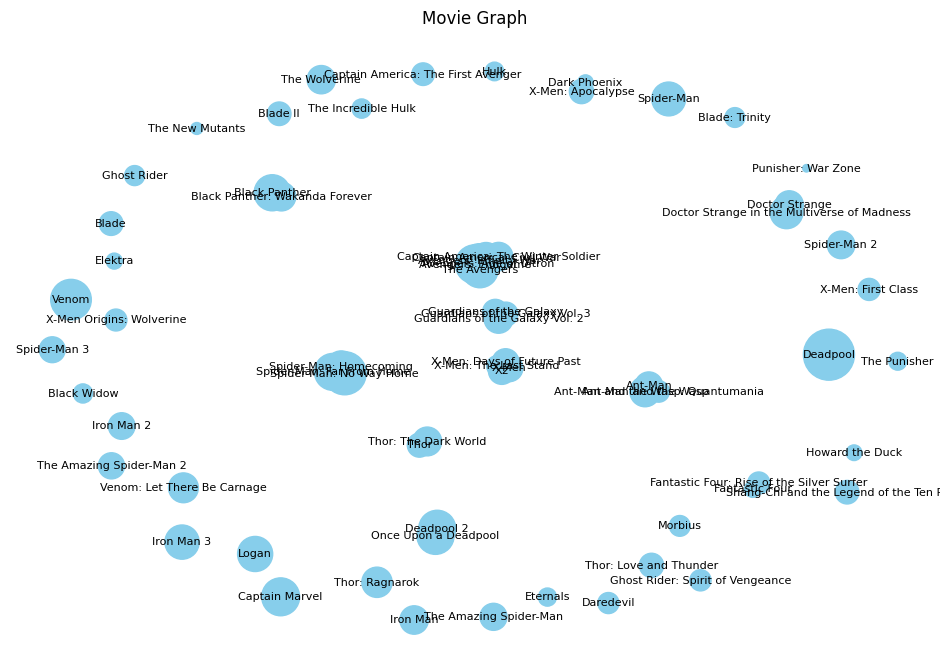

Node: Howard the Duck
Closeness Centrality: 0.0
Betweenness Centrality: 0.0
Degree Centrality: 0.0
Clustering Coefficient: 0
Eigenvector Centrality: 5.317739326516918e-32

Node: Blade
Closeness Centrality: 0.0
Betweenness Centrality: 0.0
Degree Centrality: 0.0
Clustering Coefficient: 0
Eigenvector Centrality: 5.317739326516918e-32

Node: X-Men
Closeness Centrality: 0.045454545454545456
Betweenness Centrality: 0.0
Degree Centrality: 0.045454545454545456
Clustering Coefficient: 1.0
Eigenvector Centrality: 6.583042430777765e-05

Node: Blade II
Closeness Centrality: 0.0
Betweenness Centrality: 0.0
Degree Centrality: 0.0
Clustering Coefficient: 0
Eigenvector Centrality: 5.317739326516918e-32

Node: Spider-Man
Closeness Centrality: 0.0
Betweenness Centrality: 0.0
Degree Centrality: 0.0
Clustering Coefficient: 0
Eigenvector Centrality: 5.317739326516918e-32

Node: Daredevil
Closeness Centrality: 0.0
Betweenness Centrality: 0.0
Degree Centrality: 0.0
Clustering Coefficient: 0
Eigenvector Centr

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import statsmodels.api as sm
G = nx.Graph()
from google.colab import files
# Add nodes with movie titles and node sizes as box office
for index, row in df.iterrows():
    movie_title = row['movie_name']
    box_office = row['Box office (in Million Dollars)']
    budget = row['Budget (in Million Dollars)']
    score = row['Critic Score (from Rotten Tomatoes)']
    G.add_node(movie_title, size=100*score*box_office/budget)

# Calculate edge weights based on common actors and add edges to the graph

common_actors_threshold = 6  #OYNAYABİLİRSİN BUNLA
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        actors1 = set(df.loc[i, 'Starrings'])
        actors2 = set(df.loc[j, 'Starrings'])
        common_actors = actors1.intersection(actors2)
        edge_weight = len(common_actors)
        if edge_weight >= common_actors_threshold:
            G.add_edge(df.loc[i, 'movie_name'], df.loc[j, 'movie_name'], weight=edge_weight)

# Get node sizes and edge weights
node_sizes = [G.nodes[node]['size'] for node in G.nodes()]                                                                      ###############################     AKTOR TRESHOLDLU KOD    #####################################
edge_weights = [G.edges[edge]['weight'] for edge in G.edges()]

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.15, iterations=50)  # Adjust k to control the distance between nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='gray', alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title('Movie Graph')
plt.axis('off')
plt.show()

closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
degree_centrality = nx.degree_centrality(G)
clustering_coefficient = nx.clustering(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Print the centrality measures for each node
for node in G.nodes():
    print(f"Node: {node}")
    print(f"Closeness Centrality: {closeness_centrality[node]}")
    print(f"Betweenness Centrality: {betweenness_centrality[node]}")
    print(f"Degree Centrality: {degree_centrality[node]}")
    print(f"Clustering Coefficient: {clustering_coefficient[node]}")
    print(f"Eigenvector Centrality: {eigenvector_centrality[node]}")
    print()
    '''
# Perform regression analysis
X = df[['Starrings']]  # Use budget as the independent variable
y = df['Box office (in Million Dollars)']  # Use box office as the dependent variable
X = sm.add_constant(X)  # Add a constant term to the independent variable

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

# Perform hypothesis test on the regression coefficient
coef = results.params['Budget (in Million Dollars)']
p_value = results.pvalues['Budget (in Million Dollars)']

print('Regression coefficient:', coef)
print('p-value:', p_value)

closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Print the closeness centrality and betweenness centrality for each node
for node in G.nodes():
    print(f"Node: {node}")
    print(f"Closeness Centrality: {closeness_centrality[node]}")
    print(f"Betweenness Centrality: {betweenness_centrality[node]}")
    print()

nx.write_gexf(G, 'marvel_movies_network.gexf')
files.download("marvel_movies_network.gexf")
'''

nx.write_gexf(G, "starrings_6.gexf")
files.download("starrings_6.gexf")


In [ ]:
from google.colab import files

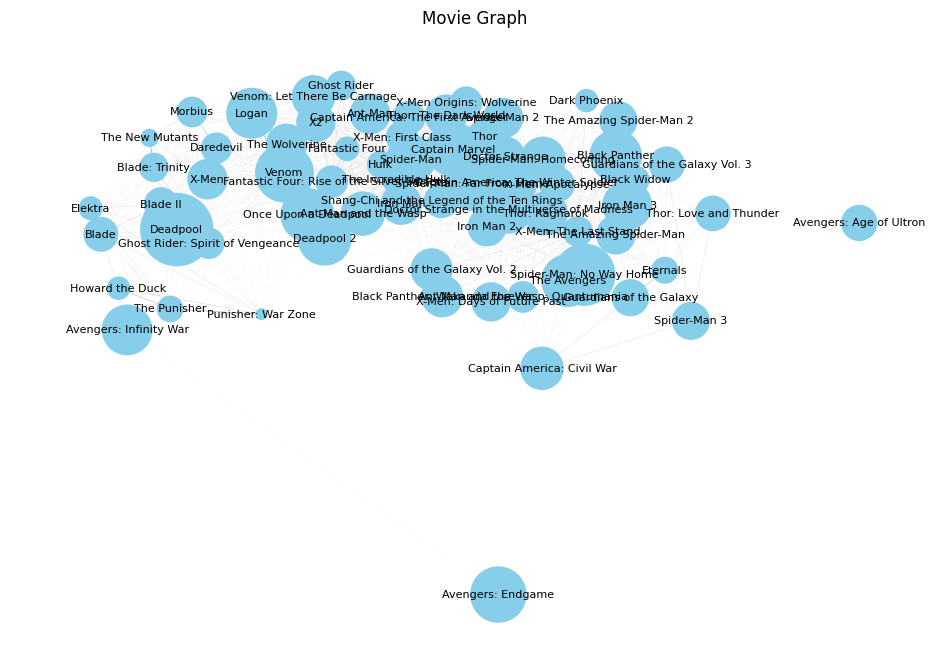

Node: Howard the Duck
Closeness Centrality: 0.5454545454545454
Betweenness Centrality: 0.00011826729775447723

Node: Blade
Closeness Centrality: 0.5892857142857143
Betweenness Centrality: 0.0005665890770149228

Node: X-Men
Closeness Centrality: 0.6875
Betweenness Centrality: 0.0028515673193558796

Node: Blade II
Closeness Centrality: 0.6346153846153846
Betweenness Centrality: 0.0012740673522921087

Node: Spider-Man
Closeness Centrality: 0.8354430379746836
Betweenness Centrality: 0.00790160267578555

Node: Daredevil
Closeness Centrality: 0.7021276595744681
Betweenness Centrality: 0.0032010540630391434

Node: X2
Closeness Centrality: 0.7857142857142857
Betweenness Centrality: 0.00963359390048482

Node: Hulk
Closeness Centrality: 0.8354430379746836
Betweenness Centrality: 0.00790160267578555

Node: The Punisher
Closeness Centrality: 0.5454545454545454
Betweenness Centrality: 0.00011826729775447723

Node: Spider-Man 2
Closeness Centrality: 0.6947368421052632
Betweenness Centrality: 0.00379

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import statsmodels.api as sm
G = nx.Graph()

# Add nodes with movie titles and node sizes as box office
for index, row in df.iterrows():
    movie_title = row['movie_name']
    box_office = row['Box office (in Million Dollars)']
    score = row['Critic Score (from Rotten Tomatoes)']
    budget=row['Budget (in Million Dollars)']
    G.add_node(movie_title, size=100*box_office/budget, budget=row['Budget (in Million Dollars)'])

# Define a budget threshold
budget_threshold = 100  # Adjust this value according to your needs

# Calculate edge weights based on budget similarity and add edges to the graph
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        budget_diff = abs(df.loc[i, 'Budget (in Million Dollars)'] - df.loc[j, 'Budget (in Million Dollars)'])
        if 0 < budget_diff <= budget_threshold:
            edge_weight = 1 / budget_diff  # inverse of budget difference
            G.add_edge(df.loc[i, 'movie_name'], df.loc[j, 'movie_name'], weight=edge_weight)

# Get node sizes and edge weights
node_sizes = [G.nodes[node]['size']*2 for node in G.nodes()]
edge_weights = [G.edges[edge]['weight'] for edge in G.edges()]

# Draw the graph
plt.figure(figsize=(12, 8))                                                                                                                ##################### BUDGET VS BOX OFFICE BAKIYO BU DA BENZER BUDGETLAR EDGE NODE SIZE BOX OFFICE  ##############################
pos = nx.spring_layout(G, k=0.3, iterations=50)  # Layout the graph nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='black', alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title('Movie Graph')
plt.axis('off')
plt.show()

# Calculate centrality measures
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Print the closeness centrality and betweenness centrality for each node
for node in G.nodes():
    print(f"Node: {node}")
    print(f"Closeness Centrality: {closeness_centrality[node]}")
    print(f"Betweenness Centrality: {betweenness_centrality[node]}")
    print()

 # Perform regression analysis
X = df[['Budget (in Million Dollars)']]  # Use budget as the independent variable
y = df['Box office (in Million Dollars)']  # Use box office as the dependent variable
X = sm.add_constant(X)  # Add a constant term to the independent variable

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

# Perform hypothesis test on the regression coefficient
coef = results.params['Budget (in Million Dollars)']
p_value = results.pvalues['Budget (in Million Dollars)']

print('Regression coefficient:', coef)
print('p-value:', p_value)
nx.write_gexf(G, "budget_100.gexf")
files.download("budget_100.gexf")


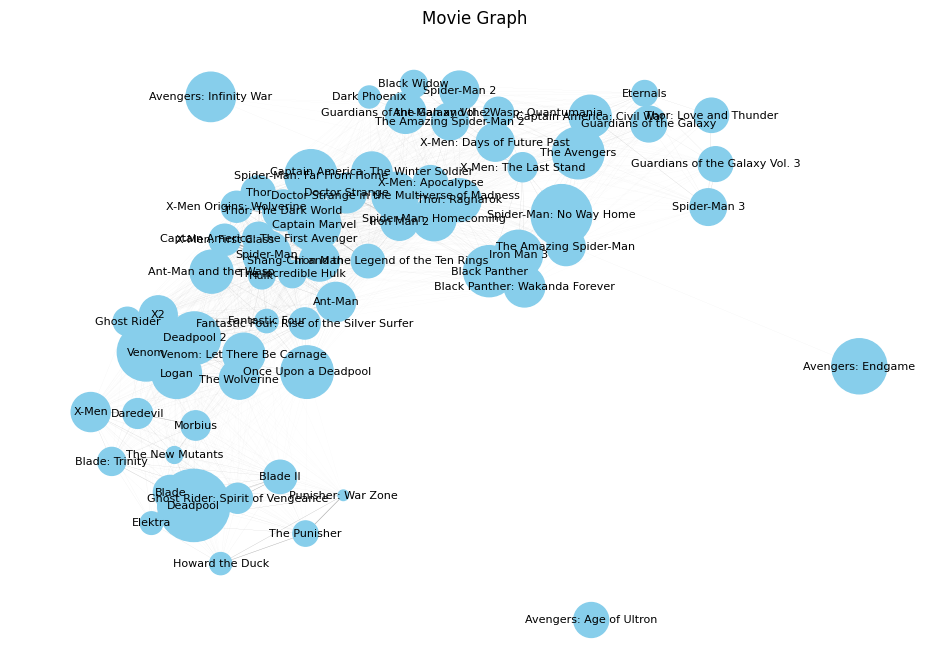

Node: Howard the Duck
Closeness Centrality: 0.5247143566815698
Betweenness Centrality: 0.00014435037059471446

Node: Blade
Closeness Centrality: 0.5290508389681944
Betweenness Centrality: 0.00021796097052110386

Node: X-Men
Closeness Centrality: 0.5982724440668366
Betweenness Centrality: 0.0037487819123045198

Node: Blade II
Closeness Centrality: 0.5425012840267077
Betweenness Centrality: 0.0005123621828377713

Node: Spider-Man
Closeness Centrality: 0.7531194295900178
Betweenness Centrality: 0.008438696975980289

Node: Daredevil
Closeness Centrality: 0.6039165237278444
Betweenness Centrality: 0.0037624936907221804

Node: X2
Closeness Centrality: 0.6810122501611864
Betweenness Centrality: 0.010112937287037639

Node: Hulk
Closeness Centrality: 0.771266885724717
Betweenness Centrality: 0.012920774297669947

Node: The Punisher
Closeness Centrality: 0.5247143566815698
Betweenness Centrality: 0.00014435037059471446

Node: Spider-Man 2
Closeness Centrality: 0.6401515151515151
Betweenness Cent

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import statsmodels.api as sm
G = nx.Graph()

# Add nodes with movie titles and node sizes as box office
for index, row in df.iterrows():
    movie_title = row['movie_name']
    box_office = row['Box office (in Million Dollars)']
    score = row['Critic Score (from Rotten Tomatoes)']
    budget=row['Budget (in Million Dollars)']
    G.add_node(movie_title, size=100*score*box_office/budget, budget=row['Budget (in Million Dollars)'])

# Define a budget threshold
budget_threshold = 80  # Adjust this value according to your needs

# Calculate edge weights based on budget similarity and add edges to the graph
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        budget_diff = abs(df.loc[i, 'Budget (in Million Dollars)'] - df.loc[j, 'Budget (in Million Dollars)'])
        if 0 < budget_diff <= budget_threshold:
            edge_weight = 1 / budget_diff  # inverse of budget difference
            G.add_edge(df.loc[i, 'movie_name'], df.loc[j, 'movie_name'], weight=edge_weight)

# Get node sizes and edge weights
node_sizes = [G.nodes[node]['size']*2 for node in G.nodes()]
edge_weights = [G.edges[edge]['weight'] for edge in G.edges()]

# Draw the graph
plt.figure(figsize=(12, 8))                                                                                                                ##################### BUDGET VS BOX OFFICE BAKIYO BU DA BENZER BUDGETLAR EDGE NODE SIZE BOX OFFICE  ##############################
pos = nx.spring_layout(G, k=0.3, iterations=50)  # Layout the graph nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='black', alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title('Movie Graph')
plt.axis('off')
plt.show()

# Calculate centrality measures
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Print the closeness centrality and betweenness centrality for each node
for node in G.nodes():
    print(f"Node: {node}")
    print(f"Closeness Centrality: {closeness_centrality[node]}")
    print(f"Betweenness Centrality: {betweenness_centrality[node]}")
    print()

 # Perform regression analysis
X = df[['Budget (in Million Dollars)']]  # Use budget as the independent variable
y = df['Box office (in Million Dollars)']  # Use box office as the dependent variable
X = sm.add_constant(X)  # Add a constant term to the independent variable

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

# Perform hypothesis test on the regression coefficient
coef = results.params['Budget (in Million Dollars)']
p_value = results.pvalues['Budget (in Million Dollars)']

print('Regression coefficient:', coef)
print('p-value:', p_value)
nx.write_gexf(G, "budget_80.gexf")
files.download("budget_80.gexf")


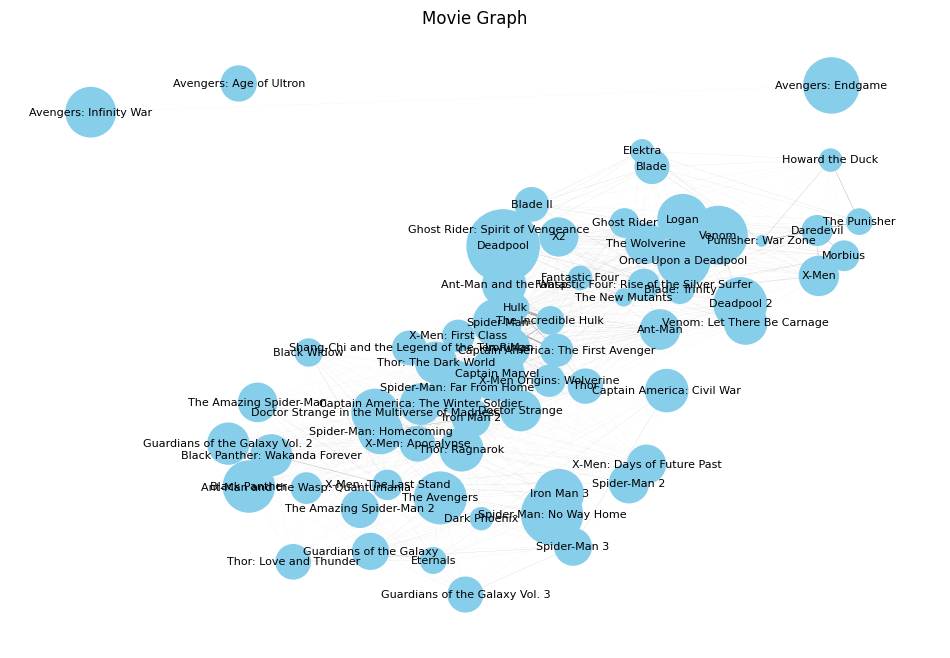

Node: Howard the Duck
Closeness Centrality: 0.43895155938951563
Betweenness Centrality: 2.026958548697679e-05

Node: Blade
Closeness Centrality: 0.44877883310719136
Betweenness Centrality: 0.00041627509512885

Node: X-Men
Closeness Centrality: 0.4735146743020759
Betweenness Centrality: 0.0035103235278060446

Node: Blade II
Closeness Centrality: 0.46617336152219874
Betweenness Centrality: 0.0017371764160301708

Node: Spider-Man
Closeness Centrality: 0.6013636363636364
Betweenness Centrality: 0.0014920436135778203

Node: Daredevil
Closeness Centrality: 0.48497067448680353
Betweenness Centrality: 0.005894848904122238

Node: X2
Closeness Centrality: 0.589572192513369
Betweenness Centrality: 0.013214188843081624

Node: Hulk
Closeness Centrality: 0.6074380165289256
Betweenness Centrality: 0.0031770465870942584

Node: The Punisher
Closeness Centrality: 0.43895155938951563
Betweenness Centrality: 2.026958548697679e-05

Node: Spider-Man 2
Closeness Centrality: 0.5229249011857707
Betweenness Cen

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import statsmodels.api as sm
G = nx.Graph()

# Add nodes with movie titles and node sizes as box office
for index, row in df.iterrows():
    movie_title = row['movie_name']
    box_office = row['Box office (in Million Dollars)']
    budget=row['Budget (in Million Dollars)']
    G.add_node(movie_title, size=100*score*box_office/budget, budget=row['Budget (in Million Dollars)'])

# Define a budget threshold
budget_threshold = 60  # Adjust this value according to your needs

# Calculate edge weights based on budget similarity and add edges to the graph
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        budget_diff = abs(df.loc[i, 'Budget (in Million Dollars)'] - df.loc[j, 'Budget (in Million Dollars)'])
        if 0 < budget_diff <= budget_threshold:
            edge_weight = 1 / budget_diff  # inverse of budget difference
            G.add_edge(df.loc[i, 'movie_name'], df.loc[j, 'movie_name'], weight=edge_weight)

# Get node sizes and edge weights
node_sizes = [G.nodes[node]['size']*2 for node in G.nodes()]
edge_weights = [G.edges[edge]['weight'] for edge in G.edges()]

# Draw the graph
plt.figure(figsize=(12, 8))                                                                                                                ##################### BUDGET VS BOX OFFICE BAKIYO BU DA BENZER BUDGETLAR EDGE NODE SIZE BOX OFFICE  ##############################
pos = nx.spring_layout(G, k=0.3, iterations=50)  # Layout the graph nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='black', alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title('Movie Graph')
plt.axis('off')
plt.show()

# Calculate centrality measures
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Print the closeness centrality and betweenness centrality for each node
for node in G.nodes():
    print(f"Node: {node}")
    print(f"Closeness Centrality: {closeness_centrality[node]}")
    print(f"Betweenness Centrality: {betweenness_centrality[node]}")
    print()

 # Perform regression analysis
X = df[['Budget (in Million Dollars)']]  # Use budget as the independent variable
y = df['Box office (in Million Dollars)']  # Use box office as the dependent variable
X = sm.add_constant(X)  # Add a constant term to the independent variable

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

# Perform hypothesis test on the regression coefficient
coef = results.params['Budget (in Million Dollars)']
p_value = results.pvalues['Budget (in Million Dollars)']

print('Regression coefficient:', coef)
print('p-value:', p_value)
nx.write_gexf(G, "budget_60.gexf")
files.download("budget_60.gexf")


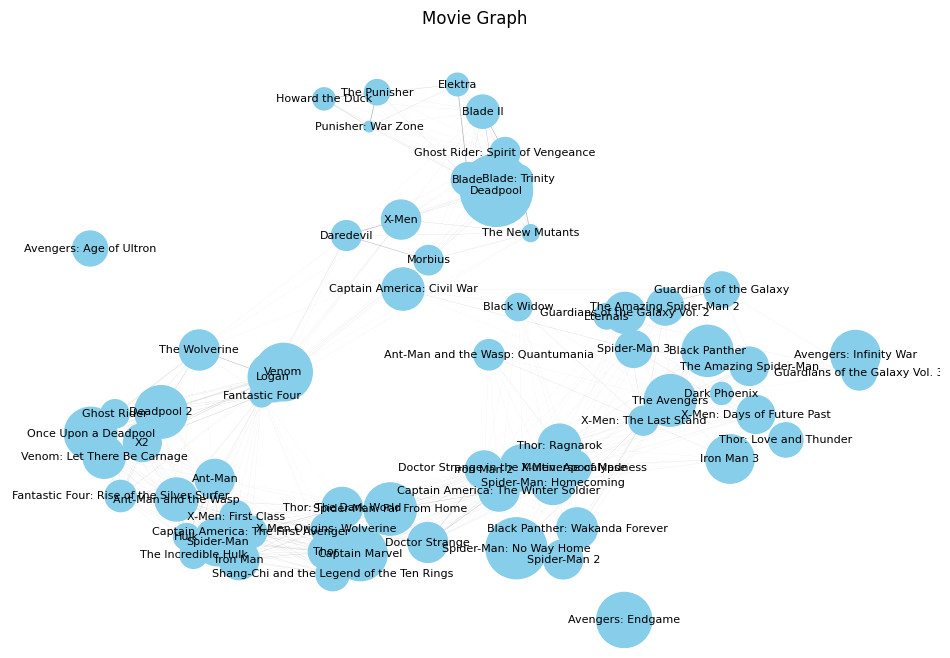

Node: Howard the Duck
Closeness Centrality: 0.26146245059288536
Betweenness Centrality: 0.0

Node: Blade
Closeness Centrality: 0.27088452088452086
Betweenness Centrality: 0.0021639230112399945

Node: X-Men
Closeness Centrality: 0.34363636363636363
Betweenness Centrality: 0.01751020131862412

Node: Blade II
Closeness Centrality: 0.272110242698478
Betweenness Centrality: 0.0031493477326042323

Node: Spider-Man
Closeness Centrality: 0.4205340114431024
Betweenness Centrality: 0.005988186035193922

Node: Daredevil
Closeness Centrality: 0.34363636363636363
Betweenness Centrality: 0.011416035071406079

Node: X2
Closeness Centrality: 0.3782161234991424
Betweenness Centrality: 0.0027937015029656604

Node: Hulk
Closeness Centrality: 0.4205340114431024
Betweenness Centrality: 0.005988186035193922

Node: The Punisher
Closeness Centrality: 0.26146245059288536
Betweenness Centrality: 0.0

Node: Spider-Man 2
Closeness Centrality: 0.3537433155080214
Betweenness Centrality: 0.008342452142260532

Node: 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import statsmodels.api as sm
G = nx.Graph()

# Add nodes with movie titles and node sizes as box office
for index, row in df.iterrows():
    movie_title = row['movie_name']
    box_office = row['Box office (in Million Dollars)']
    budget=row['Budget (in Million Dollars)']
    score = row['Critic Score (from Rotten Tomatoes)']
    G.add_node(movie_title, size=100*score*box_office/budget, budget=row['Budget (in Million Dollars)'])

# Define a budget threshold
budget_threshold = 30  # Adjust this value according to your needs

# Calculate edge weights based on budget similarity and add edges to the graph
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        budget_diff = abs(df.loc[i, 'Budget (in Million Dollars)'] - df.loc[j, 'Budget (in Million Dollars)'])
        if 0 < budget_diff <= budget_threshold:
            edge_weight = 1 / budget_diff  # inverse of budget difference
            G.add_edge(df.loc[i, 'movie_name'], df.loc[j, 'movie_name'], weight=edge_weight)

# Get node sizes and edge weights
node_sizes = [G.nodes[node]['size']*2 for node in G.nodes()]
edge_weights = [G.edges[edge]['weight'] for edge in G.edges()]

# Draw the graph
plt.figure(figsize=(12, 8))                                                                                                                ##################### BUDGET VS BOX OFFICE BAKIYO BU DA BENZER BUDGETLAR EDGE NODE SIZE BOX OFFICE  ##############################
pos = nx.spring_layout(G, k=0.3, iterations=50)  # Layout the graph nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='black', alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title('Movie Graph')
plt.axis('off')
plt.show()

# Calculate centrality measures
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Print the closeness centrality and betweenness centrality for each node
for node in G.nodes():
    print(f"Node: {node}")
    print(f"Closeness Centrality: {closeness_centrality[node]}")
    print(f"Betweenness Centrality: {betweenness_centrality[node]}")
    print()

 # Perform regression analysis
X = df[['Budget (in Million Dollars)']]  # Use budget as the independent variable
y = df['Box office (in Million Dollars)']  # Use box office as the dependent variable
X = sm.add_constant(X)  # Add a constant term to the independent variable

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

# Perform hypothesis test on the regression coefficient
coef = results.params['Budget (in Million Dollars)']
p_value = results.pvalues['Budget (in Million Dollars)']

print('Regression coefficient:', coef)
print('p-value:', p_value)
nx.write_gexf(G, "budget_30.gexf")
files.download("budget_30.gexf")


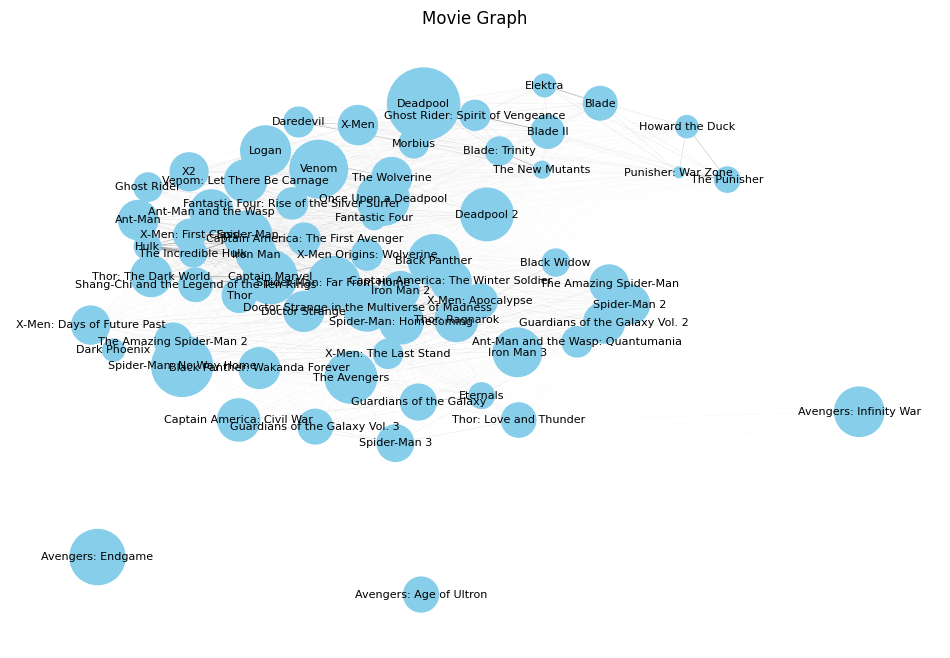

Node: Howard the Duck
Closeness Centrality: 0.7252747252747253
Betweenness Centrality: 0.00017957133020457064

Node: Blade
Closeness Centrality: 0.7252747252747253
Betweenness Centrality: 0.00017957133020457064

Node: X-Men
Closeness Centrality: 0.8571428571428571
Betweenness Centrality: 0.001768368011384509

Node: Blade II
Closeness Centrality: 0.8354430379746836
Betweenness Centrality: 0.001537828457692467

Node: Spider-Man
Closeness Centrality: 0.9428571428571428
Betweenness Centrality: 0.002932247989286307

Node: Daredevil
Closeness Centrality: 0.868421052631579
Betweenness Centrality: 0.0017766930197095174

Node: X2
Closeness Centrality: 0.8918918918918919
Betweenness Centrality: 0.002853230961116737

Node: Hulk
Closeness Centrality: 0.9428571428571428
Betweenness Centrality: 0.002932247989286307

Node: The Punisher
Closeness Centrality: 0.7252747252747253
Betweenness Centrality: 0.00017957133020457064

Node: Spider-Man 2
Closeness Centrality: 0.7857142857142857
Betweenness Centra

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import statsmodels.api as sm
G = nx.Graph()

# Add nodes with movie titles and node sizes as box office
for index, row in df.iterrows():
    movie_title = row['movie_name']
    box_office = row['Box office (in Million Dollars)']
    budget=row['Budget (in Million Dollars)']
    score = row['Critic Score (from Rotten Tomatoes)']
    G.add_node(movie_title, size=100*score*box_office/budget, budget=row['Budget (in Million Dollars)'])

# Define a budget threshold
budget_threshold = 150  # Adjust this value according to your needs

# Calculate edge weights based on budget similarity and add edges to the graph
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        budget_diff = abs(df.loc[i, 'Budget (in Million Dollars)'] - df.loc[j, 'Budget (in Million Dollars)'])
        if 0 < budget_diff <= budget_threshold:
            edge_weight = 1 / budget_diff  # inverse of budget difference
            G.add_edge(df.loc[i, 'movie_name'], df.loc[j, 'movie_name'], weight=edge_weight)

# Get node sizes and edge weights
node_sizes = [G.nodes[node]['size']*2 for node in G.nodes()]
edge_weights = [G.edges[edge]['weight'] for edge in G.edges()]

# Draw the graph
plt.figure(figsize=(12, 8))                                                                                                                ##################### BUDGET VS BOX OFFICE BAKIYO BU DA BENZER BUDGETLAR EDGE NODE SIZE BOX OFFICE  ##############################
pos = nx.spring_layout(G, k=0.3, iterations=50)  # Layout the graph nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='black', alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title('Movie Graph')
plt.axis('off')
plt.show()

# Calculate centrality measures
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Print the closeness centrality and betweenness centrality for each node
for node in G.nodes():
    print(f"Node: {node}")
    print(f"Closeness Centrality: {closeness_centrality[node]}")
    print(f"Betweenness Centrality: {betweenness_centrality[node]}")
    print()

 # Perform regression analysis
X = df[['Budget (in Million Dollars)']]  # Use budget as the independent variable
y = df['Box office (in Million Dollars)']  # Use box office as the dependent variable
X = sm.add_constant(X)  # Add a constant term to the independent variable

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

# Perform hypothesis test on the regression coefficient
coef = results.params['Budget (in Million Dollars)']
p_value = results.pvalues['Budget (in Million Dollars)']

print('Regression coefficient:', coef)
print('p-value:', p_value)
nx.write_gexf(G, "budget_150.gexf")
files.download("budget_150.gexf")


                                   OLS Regression Results                                  
Dep. Variable:     Box office (in Million Dollars)   R-squared:                       0.529
Model:                                         OLS   Adj. R-squared:                  0.522
Method:                              Least Squares   F-statistic:                     74.19
Date:                             Fri, 02 Jun 2023   Prob (F-statistic):           2.12e-12
Time:                                     18:20:40   Log-Likelihood:                -493.24
No. Observations:                               68   AIC:                             990.5
Df Residuals:                                   66   BIC:                             994.9
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                                  coef    std err          t      P>|t|      [0.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

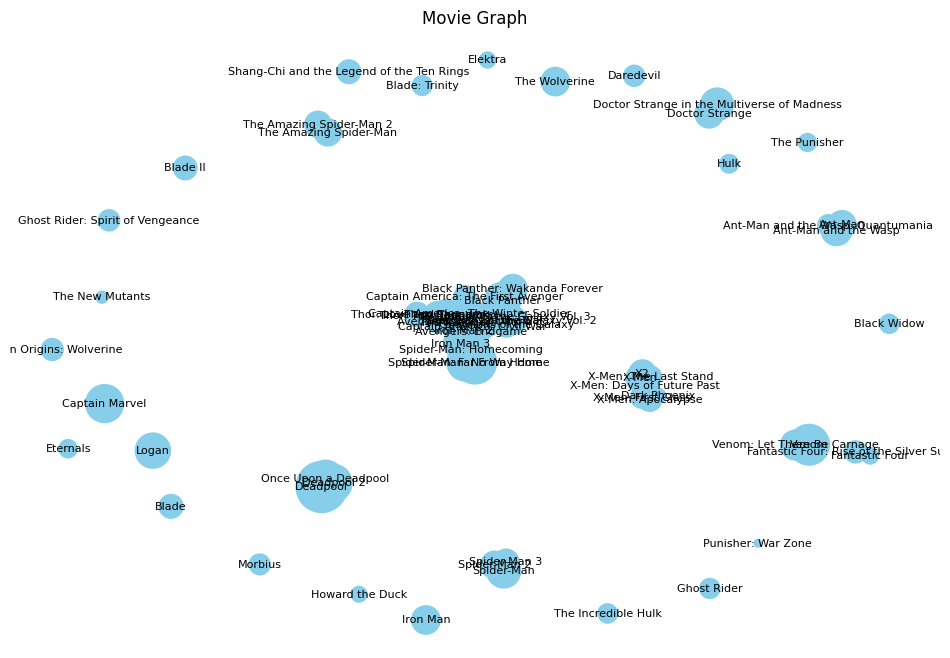

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import statsmodels.api as sm

#STARRING BAKIYO
# Create a graph object
G = nx.Graph()

# Add nodes with movie titles and node sizes as box office
for index, row in df.iterrows():
    movie_title = row['movie_name']
    box_office = row['Box office (in Million Dollars)']
    budget = row['Budget (in Million Dollars)']
    score = row['Critic Score (from Rotten Tomatoes)']
    G.add_node(movie_title, size=100*score*box_office/budget)

# Calculate edge weights based on common actors and add edges to the graph
common_actors_threshold = 4
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        actors1 = set(df.loc[i, 'Starrings'])
        actors2 = set(df.loc[j, 'Starrings'])
        common_actors = actors1.intersection(actors2)
        edge_weight = len(common_actors)
        if edge_weight >= common_actors_threshold:
            G.add_edge(df.loc[i, 'movie_name'], df.loc[j, 'movie_name'], weight=edge_weight)

# Get node sizes and edge weights
node_sizes = [G.nodes[node]['size'] for node in G.nodes()]
edge_weights = [G.edges[edge]['weight'] for edge in G.edges()]

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.15, iterations=50)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='gray', alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title('Movie Graph')
plt.axis('off')
#plt.show()

# Perform regression analysis
X = df[['Budget (in Million Dollars)']]  # Use budget as the independent variable
y = df['Box office (in Million Dollars)']  # Use box office as the dependent variable
X = sm.add_constant(X)  # Add a constant term to the independent variable

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

# Perform hypothesis test on the regression coefficient
coef = results.params['Budget (in Million Dollars)']
p_value = results.pvalues['Budget (in Million Dollars)']

print('Regression coefficient:', coef)
print('p-value:', p_value)

nx.write_gexf(G, "starrings4.gexf")
files.download("starrings4.gexf")


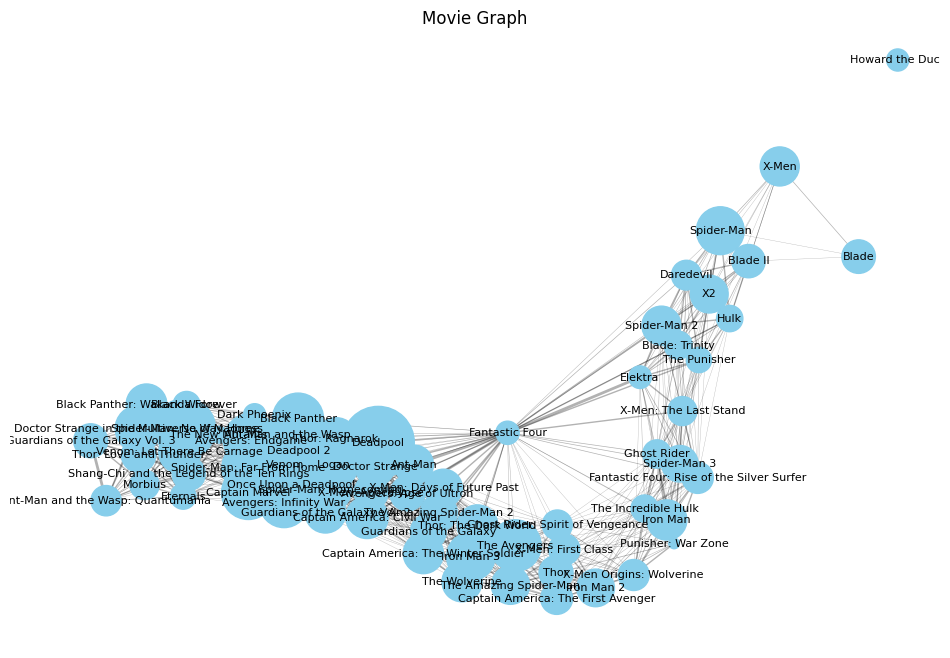

Node: Howard the Duck
Closeness Centrality: 0.0
Betweenness Centrality: 0.0

Node: Blade
Closeness Centrality: 0.3334122474747475
Betweenness Centrality: 0.0

Node: X-Men
Closeness Centrality: 0.35563973063973064
Betweenness Centrality: 0.0015617715617715618

Node: Blade II
Closeness Centrality: 0.49242424242424243
Betweenness Centrality: 0.01626775185598716

Node: Spider-Man
Closeness Centrality: 0.49242424242424243
Betweenness Centrality: 0.01626775185598716

Node: Daredevil
Closeness Centrality: 0.5001183712121212
Betweenness Centrality: 0.003542372660019718

Node: X2
Closeness Centrality: 0.5001183712121212
Betweenness Centrality: 0.003542372660019718

Node: Hulk
Closeness Centrality: 0.5001183712121212
Betweenness Centrality: 0.003542372660019718

Node: The Punisher
Closeness Centrality: 0.5121212121212122
Betweenness Centrality: 0.005612459435988847

Node: Spider-Man 2
Closeness Centrality: 0.5121212121212122
Betweenness Centrality: 0.005612459435988847

Node: Blade: Trinity
Clos

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

# Add nodes with movie titles and node sizes as box office
for index, row in df.iterrows():
    movie_title = row['movie_name']
    box_office = row['Box office (in Million Dollars)']
    budget=row['Budget (in Million Dollars)']
    score = row['Critic Score (from Rotten Tomatoes)']
    G.add_node(movie_title, size=100*score*box_office/budget, date=row['Release Date'])

# Define a budget threshold

date_threshold = 5
# Calculate edge weights based on budget similarity and add edges to the graph
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        date_diff = abs(df.loc[i, 'Release Date'] - df.loc[j, 'Release Date'])
        if date_diff >0:
           edge_weight = 1 / date_diff  # inverse of budget difference
        else:
          edge_weight = 2
        if date_diff < date_threshold:
          G.add_edge(df.loc[i, 'movie_name'], df.loc[j, 'movie_name'], weight=edge_weight)

# Get node sizes and edge weights
node_sizes = [G.nodes[node]['size']*2 for node in G.nodes()]
edge_weights = [G.edges[edge]['weight'] for edge in G.edges()]

# Draw the graph
plt.figure(figsize=(12, 8))                                                                                                                ##################### RELEASE DATE VS BOX OFFICE BAKIYO BU DA BENZER BUDGETLAR EDGE NODE SIZE BOX OFFICE  ##############################
pos = nx.spring_layout(G, k=0.3, iterations=50)  # Layout the graph nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='black', alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title('Movie Graph')
plt.axis('off')
plt.show()

# Calculate centrality measures
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Print the closeness centrality and betweenness centrality for each node
for node in G.nodes():
    print(f"Node: {node}")
    print(f"Closeness Centrality: {closeness_centrality[node]}")
    print(f"Betweenness Centrality: {betweenness_centrality[node]}")
    print()

 # Perform regression analysis
X = df[['Release Date']]  # Use budget as the independent variable
y = df['Box office (in Million Dollars)']  # Use box office as the dependent variable
X = sm.add_constant(X)  # Add a constant term to the independent variable

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

# Perform hypothesis test on the regression coefficient
coef = results.params['Release Date']
p_value = results.pvalues['Release Date']

print('Regression coefficient:', coef)
print('p-value:', p_value)
nx.write_gexf(G, 'date5.gexf')
files.download("date5.gexf")


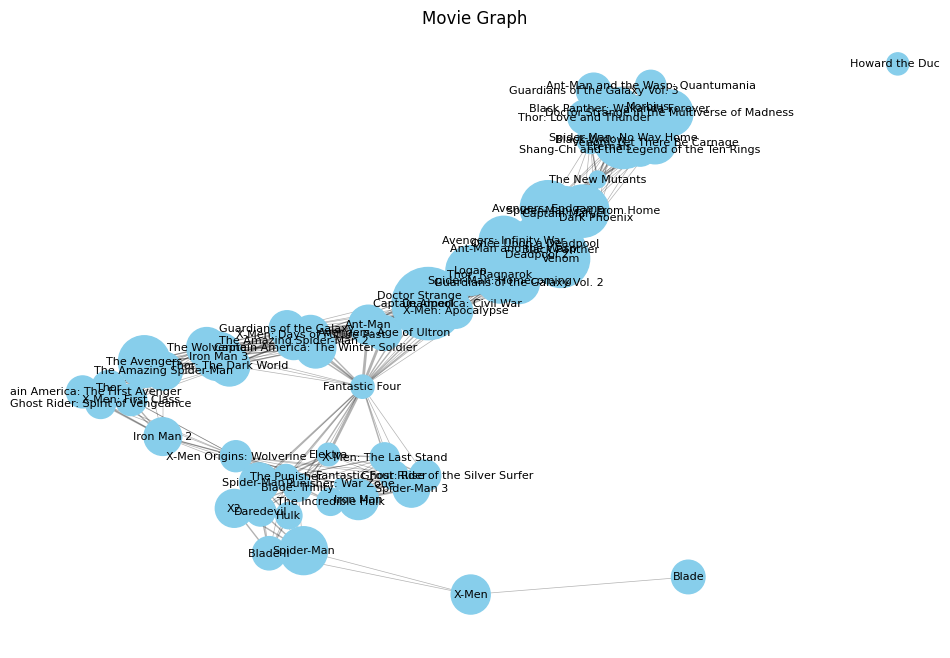

Node: Howard the Duck
Closeness Centrality: 0.0
Betweenness Centrality: 0.0

Node: Blade
Closeness Centrality: 0.18395158481365378
Betweenness Centrality: 0.0

Node: X-Men
Closeness Centrality: 0.22540546308151943
Betweenness Centrality: 0.029836829836829837

Node: Blade II
Closeness Centrality: 0.2870634597091996
Betweenness Centrality: 0.028904428904428906

Node: Spider-Man
Closeness Centrality: 0.2870634597091996
Betweenness Centrality: 0.028904428904428906

Node: Daredevil
Closeness Centrality: 0.36790316962730757
Betweenness Centrality: 0.015560735560735542

Node: X2
Closeness Centrality: 0.36790316962730757
Betweenness Centrality: 0.015560735560735542

Node: Hulk
Closeness Centrality: 0.36790316962730757
Betweenness Centrality: 0.015560735560735542

Node: The Punisher
Closeness Centrality: 0.37878787878787884
Betweenness Centrality: 0.019974607107474267

Node: Spider-Man 2
Closeness Centrality: 0.37878787878787884
Betweenness Centrality: 0.019974607107474267

Node: Blade: Trinity

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

# Add nodes with movie titles and node sizes as box office
for index, row in df.iterrows():
    movie_title = row['movie_name']
    box_office = row['Box office (in Million Dollars)']
    budget=row['Budget (in Million Dollars)']
    score = row['Critic Score (from Rotten Tomatoes)']
    G.add_node(movie_title, size=100*score*box_office/budget, date=row['Release Date'])

# Define a budget threshold

date_threshold = 3
# Calculate edge weights based on budget similarity and add edges to the graph
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        date_diff = abs(df.loc[i, 'Release Date'] - df.loc[j, 'Release Date'])
        if date_diff >0:
           edge_weight = 1 / date_diff  # inverse of budget difference
        else:
          edge_weight = 2
        if date_diff < date_threshold:
          G.add_edge(df.loc[i, 'movie_name'], df.loc[j, 'movie_name'], weight=edge_weight)

# Get node sizes and edge weights
node_sizes = [G.nodes[node]['size']*2 for node in G.nodes()]
edge_weights = [G.edges[edge]['weight'] for edge in G.edges()]

# Draw the graph
plt.figure(figsize=(12, 8))                                                                                                                ##################### RELEASE DATE VS BOX OFFICE BAKIYO BU DA BENZER BUDGETLAR EDGE NODE SIZE BOX OFFICE  ##############################
pos = nx.spring_layout(G, k=0.3, iterations=50)  # Layout the graph nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='black', alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title('Movie Graph')
plt.axis('off')
plt.show()

# Calculate centrality measures
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Print the closeness centrality and betweenness centrality for each node
for node in G.nodes():
    print(f"Node: {node}")
    print(f"Closeness Centrality: {closeness_centrality[node]}")
    print(f"Betweenness Centrality: {betweenness_centrality[node]}")
    print()

 # Perform regression analysis
X = df[['Release Date']]  # Use budget as the independent variable
y = df['Box office (in Million Dollars)']  # Use box office as the dependent variable
X = sm.add_constant(X)  # Add a constant term to the independent variable

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

# Perform hypothesis test on the regression coefficient
coef = results.params['Release Date']
p_value = results.pvalues['Release Date']

print('Regression coefficient:', coef)
print('p-value:', p_value)
nx.write_gexf(G, 'date3.gexf')
files.download("date3.gexf")


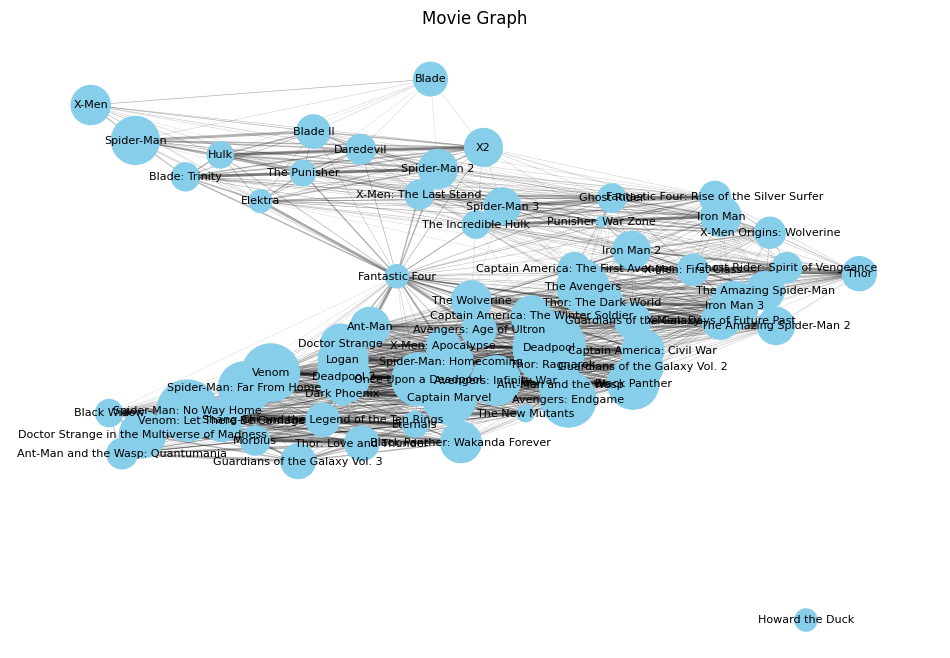

Node: Howard the Duck
Closeness Centrality: 0.0
Betweenness Centrality: 0.0

Node: Blade
Closeness Centrality: 0.37218111346018323
Betweenness Centrality: 0.0

Node: X-Men
Closeness Centrality: 0.5162512218963832
Betweenness Centrality: 0.0018555515014845138

Node: Blade II
Closeness Centrality: 0.5425012840267077
Betweenness Centrality: 0.0029276309372003135

Node: Spider-Man
Closeness Centrality: 0.5425012840267077
Betweenness Centrality: 0.0029276309372003135

Node: Daredevil
Closeness Centrality: 0.5471380471380471
Betweenness Centrality: 0.003271314189974474

Node: X2
Closeness Centrality: 0.5471380471380471
Betweenness Centrality: 0.003271314189974474

Node: Hulk
Closeness Centrality: 0.5471380471380471
Betweenness Centrality: 0.003271314189974474

Node: The Punisher
Closeness Centrality: 0.5518547544409613
Betweenness Centrality: 0.004029838262447757

Node: Spider-Man 2
Closeness Centrality: 0.5518547544409613
Betweenness Centrality: 0.004029838262447757

Node: Blade: Trinity
Cl

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

# Add nodes with movie titles and node sizes as box office
for index, row in df.iterrows():
    movie_title = row['movie_name']
    box_office = row['Box office (in Million Dollars)']
    budget=row['Budget (in Million Dollars)']
    score = row['Critic Score (from Rotten Tomatoes)']
    G.add_node(movie_title, size=100*score*box_office/budget, date=row['Release Date'])

# Define a budget threshold

date_threshold = 7
# Calculate edge weights based on budget similarity and add edges to the graph
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        date_diff = abs(df.loc[i, 'Release Date'] - df.loc[j, 'Release Date'])
        if date_diff >0:
           edge_weight = 1 / date_diff  # inverse of budget difference
        else:
          edge_weight = 2
        if date_diff < date_threshold:
          G.add_edge(df.loc[i, 'movie_name'], df.loc[j, 'movie_name'], weight=edge_weight)

# Get node sizes and edge weights
node_sizes = [G.nodes[node]['size']*2 for node in G.nodes()]
edge_weights = [G.edges[edge]['weight'] for edge in G.edges()]

# Draw the graph
plt.figure(figsize=(12, 8))                                                                                                                ##################### RELEASE DATE VS BOX OFFICE BAKIYO BU DA BENZER BUDGETLAR EDGE NODE SIZE BOX OFFICE  ##############################
pos = nx.spring_layout(G, k=0.3, iterations=50)  # Layout the graph nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='black', alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title('Movie Graph')
plt.axis('off')
plt.show()

# Calculate centrality measures
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Print the closeness centrality and betweenness centrality for each node
for node in G.nodes():
    print(f"Node: {node}")
    print(f"Closeness Centrality: {closeness_centrality[node]}")
    print(f"Betweenness Centrality: {betweenness_centrality[node]}")
    print()

 # Perform regression analysis
X = df[['Release Date']]  # Use budget as the independent variable
y = df['Box office (in Million Dollars)']  # Use box office as the dependent variable
X = sm.add_constant(X)  # Add a constant term to the independent variable

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

# Perform hypothesis test on the regression coefficient
coef = results.params['Release Date']
p_value = results.pvalues['Release Date']

print('Regression coefficient:', coef)
print('p-value:', p_value)
nx.write_gexf(G, 'date7.gexf')
files.download("date7.gexf")


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

# Add nodes with movie titles and node sizes as box office
for index, row in df.iterrows():
    movie_title = row['movie_name']
    box_office = row['Box office (in Million Dollars)']
    budget=row['Budget (in Million Dollars)']
    score= row['Critic Score (from Rotten Tomatoes)']
    G.add_node(movie_title, size=100*box_office/budget, time=row['Time (in minutes)'])

# Define a budget threshold
time_threshold = 40 # Adjust this value according to your needs

# Calculate edge weights based on budget similarity and add edges to the graph
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        time_diff = abs(df.loc[i, 'Time (in minutes)'] - df.loc[j, 'Time (in minutes)'])
        if 0 < time_diff <= time_threshold:
            edge_weight = 1 / time_diff  # inverse of budget difference
            G.add_edge(df.loc[i, 'movie_name'], df.loc[j, 'movie_name'], weight=edge_weight)

# Get node sizes and edge weights
node_sizes = [G.nodes[node]['size']*2 for node in G.nodes()]
edge_weights = [G.edges[edge]['weight'] for edge in G.edges()]

# Draw the graph
plt.figure(figsize=(12, 8))                                                                                                                ##################### DURATION VS BOX OFFICE BAKIYO BU DA BENZER BUDGETLAR EDGE NODE SIZE BOX OFFICE  ##############################
pos = nx.spring_layout(G, k=0.3, iterations=50)  # Layout the graph nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='black', alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title('Movie Graph')
plt.axis('off')
plt.show()

# Calculate centrality measures
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Print the closeness centrality and betweenness centrality for each node
for node in G.nodes():
    print(f"Node: {node}")
    print(f"Closeness Centrality: {closeness_centrality[node]}")
    print(f"Betweenness Centrality: {betweenness_centrality[node]}")
    print()

 # Perform regression analysis
X = df['Time (in minutes)'] # Use budget as the independent variable
y = df['Box office (in Million Dollars)']  # Use box office as the dependent variable
X = sm.add_constant(X)  # Add a constant term to the independent variable

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

# Perform hypothesis test on the regression coefficient
coef = results.params['Time (in minutes)']
p_value = results.pvalues['Time (in minutes)']

print('Regression coefficient:', coef)
print('p-value:', p_value)
nx.write_gexf(G, 'time20.gexf')
files.download("time20.gexf")


NameError: ignored

Node: Howard the Duck
Closeness Centrality: 0.0
Betweenness Centrality: 0.0
Degree Centrality: 0.0
Clustering Coefficient: 0
Eigenvector Centrality: 5.317739326516918e-32

Node: Blade
Closeness Centrality: 0.0
Betweenness Centrality: 0.0
Degree Centrality: 0.0
Clustering Coefficient: 0
Eigenvector Centrality: 5.317739326516918e-32

Node: X-Men
Closeness Centrality: 0.045454545454545456
Betweenness Centrality: 0.0
Degree Centrality: 0.045454545454545456
Clustering Coefficient: 1.0
Eigenvector Centrality: 6.583042430777765e-05

Node: Blade II
Closeness Centrality: 0.0
Betweenness Centrality: 0.0
Degree Centrality: 0.0
Clustering Coefficient: 0
Eigenvector Centrality: 5.317739326516918e-32

Node: Spider-Man
Closeness Centrality: 0.0
Betweenness Centrality: 0.0
Degree Centrality: 0.0
Clustering Coefficient: 0
Eigenvector Centrality: 5.317739326516918e-32

Node: Daredevil
Closeness Centrality: 0.0
Betweenness Centrality: 0.0
Degree Centrality: 0.0
Clustering Coefficient: 0
Eigenvector Centr

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

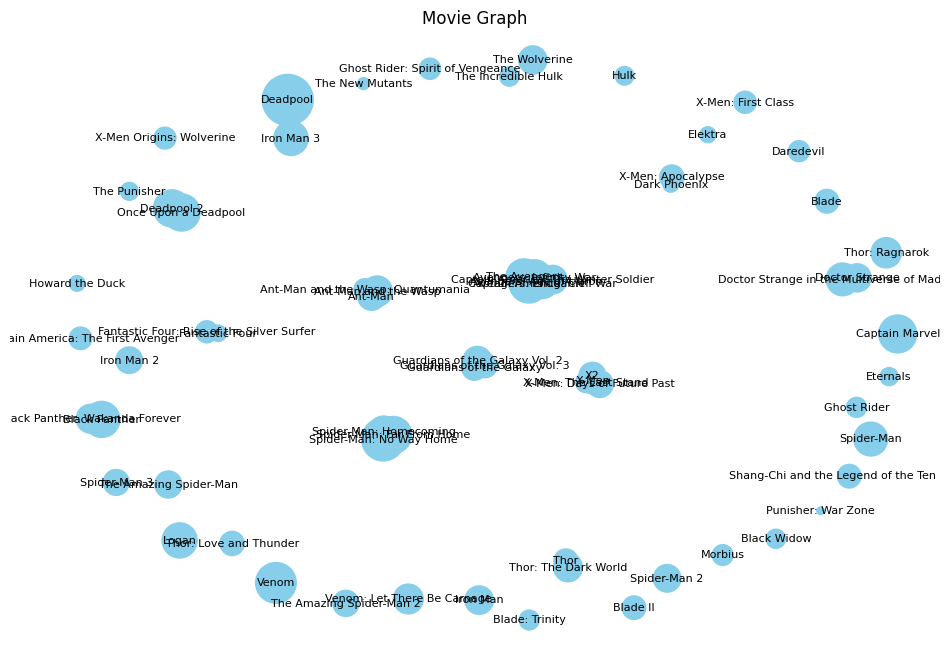

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import statsmodels.api as sm

#STARRING BAKIYO
# Create a graph object
G = nx.Graph()

# Add nodes with movie titles and node sizes as box office
for index, row in df.iterrows():
    movie_title = row['movie_name']
    box_office = row['Box office (in Million Dollars)']
    budget = row['Budget (in Million Dollars)']
    score = row['Critic Score (from Rotten Tomatoes)']
    G.add_node(movie_title, size=100*box_office/budget)

# Calculate edge weights based on common actors and add edges to the graph
common_actors_threshold = 6
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        actors1 = set(df.loc[i, 'Starrings'])
        actors2 = set(df.loc[j, 'Starrings'])
        common_actors = actors1.intersection(actors2)
        edge_weight = len(common_actors)
        if edge_weight >= common_actors_threshold:
            G.add_edge(df.loc[i, 'movie_name'], df.loc[j, 'movie_name'], weight=edge_weight)

# Get node sizes and edge weights
node_sizes = [G.nodes[node]['size'] for node in G.nodes()]
edge_weights = [G.edges[edge]['weight'] for edge in G.edges()]

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.15, iterations=50)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='gray', alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title('Movie Graph')
plt.axis('off')
#plt.show()

closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
degree_centrality = nx.degree_centrality(G)
clustering_coefficient = nx.clustering(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Print the centrality measures for each node
for node in G.nodes():
    print(f"Node: {node}")
    print(f"Closeness Centrality: {closeness_centrality[node]}")
    print(f"Betweenness Centrality: {betweenness_centrality[node]}")
    print(f"Degree Centrality: {degree_centrality[node]}")
    print(f"Clustering Coefficient: {clustering_coefficient[node]}")
    print(f"Eigenvector Centrality: {eigenvector_centrality[node]}")
    print()

# Perform regression analysis
X = df[['Budget (in Million Dollars)']]  # Use budget as the independent variable
y = df['Box office (in Million Dollars)']  # Use box office as the dependent variable
X = sm.add_constant(X)  # Add a constant term to the independent variable

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

# Perform hypothesis test on the regression coefficient
coef = results.params['Budget (in Million Dollars)']
p_value = results.pvalues['Budget (in Million Dollars)']

print('Regression coefficient:', coef)
print('p-value:', p_value)

nx.write_gexf(G, "starrings6.gexf")
files.download("starrings6.gexf")


Node: Howard the Duck
Starrings: {'', 'Linda Cardellini', 'Pom Klementieff', 'Zoe Saldaña', 'Sylvester Stallone', 'Karen Gillan', 'Will Poulter', 'Sean Gunn', 'Vin Diesel', 'Dave Bautista', 'Chukwudi Iwuji', 'Bradley Cooper', 'Chris Pratt', 'Nathan Fillion'}
Closeness Centrality: 0.0
Betweenness Centrality: 0.0

Node: Blade
Starrings: {'', 'Linda Cardellini', 'Pom Klementieff', 'Zoe Saldaña', 'Sylvester Stallone', 'Karen Gillan', 'Will Poulter', 'Sean Gunn', 'Vin Diesel', 'Dave Bautista', 'Chukwudi Iwuji', 'Bradley Cooper', 'Chris Pratt', 'Nathan Fillion'}
Closeness Centrality: 0.25981008239072756
Betweenness Centrality: 0.016806450629980048

Node: X-Men
Starrings: {'', 'Linda Cardellini', 'Pom Klementieff', 'Zoe Saldaña', 'Sylvester Stallone', 'Karen Gillan', 'Will Poulter', 'Sean Gunn', 'Vin Diesel', 'Dave Bautista', 'Chukwudi Iwuji', 'Bradley Cooper', 'Chris Pratt', 'Nathan Fillion'}
Closeness Centrality: 0.2659376786735277
Betweenness Centrality: 0.013752913752913752

Node: Blade I

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

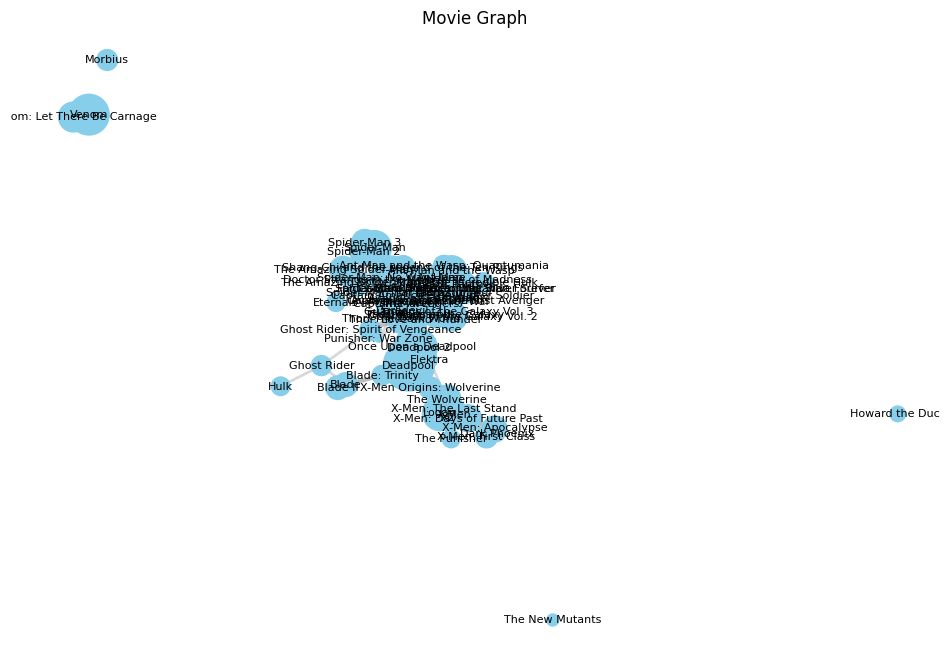

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import statsmodels.api as sm

#STARRING BAKIYO
# Create a graph object
G = nx.Graph()

# Add nodes with movie titles and node sizes as box office
for index, row in df.iterrows():
    movie_title = row['movie_name']
    box_office = row['Box office (in Million Dollars)']
    budget = row['Budget (in Million Dollars)']
    score = row['Critic Score (from Rotten Tomatoes)']
    G.add_node(movie_title, size=100*box_office/budget)

# Calculate edge weights based on common actors and add edges to the graph
common_actors_threshold = 2
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        actors1 = set(df.loc[i, 'Starrings'])
        actors2 = set(df.loc[j, 'Starrings'])
        common_actors = actors1.intersection(actors2)
        edge_weight = len(common_actors)
        if edge_weight >= common_actors_threshold:
            G.add_edge(df.loc[i, 'movie_name'], df.loc[j, 'movie_name'], weight=edge_weight)

# Get node sizes and edge weights
node_sizes = [G.nodes[node]['size'] for node in G.nodes()]
edge_weights = [G.edges[edge]['weight'] for edge in G.edges()]

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.15, iterations=50)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='gray', alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title('Movie Graph')
plt.axis('off')
#plt.show()

closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
degree_centrality = nx.degree_centrality(G)
clustering_coefficient = nx.clustering(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Print the centrality measures for each node
for node in G.nodes():
    actors1 = set(df.loc[i, 'Starrings'])
    print(f"Node: {node}")
    print(f"Starrings: {actors1}")
    print(f"Closeness Centrality: {closeness_centrality[node]}")
    print(f"Betweenness Centrality: {betweenness_centrality[node]}")
    print()
# Perform regression analysis
X = df[['Budget (in Million Dollars)']]  # Use budget as the independent variable
y = df['Box office (in Million Dollars)']  # Use box office as the dependent variable
X = sm.add_constant(X)  # Add a constant term to the independent variable

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

# Perform hypothesis test on the regression coefficient
coef = results.params['Budget (in Million Dollars)']
p_value = results.pvalues['Budget (in Million Dollars)']

print('Regression coefficient:', coef)
print('p-value:', p_value)

nx.write_gexf(G, "starrings2.gexf")
files.download("starrings2.gexf")


                                   OLS Regression Results                                  
Dep. Variable:     Box office (in Million Dollars)   R-squared:                       0.531
Model:                                         OLS   Adj. R-squared:                  0.524
Method:                              Least Squares   F-statistic:                     74.62
Date:                             Mon, 05 Jun 2023   Prob (F-statistic):           1.91e-12
Time:                                     12:43:43   Log-Likelihood:                -493.15
No. Observations:                               68   AIC:                             990.3
Df Residuals:                                   66   BIC:                             994.7
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                                  coef    std err          t      P>|t|      [0.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

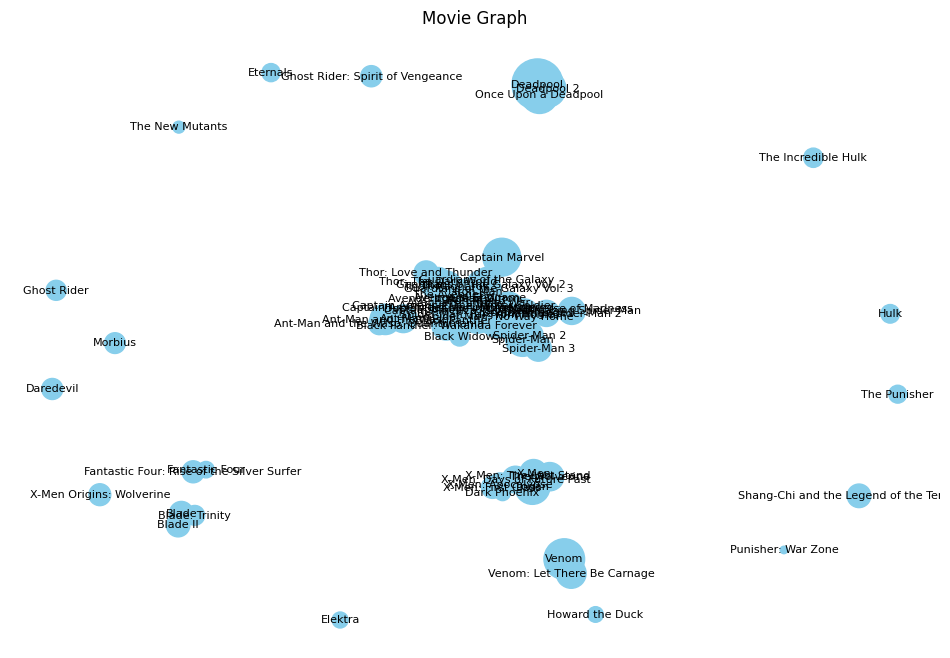

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import statsmodels.api as sm

#STARRING BAKIYO
# Create a graph object
G = nx.Graph()

# Add nodes with movie titles and node sizes as box office
for index, row in df.iterrows():
    movie_title = row['movie_name']
    box_office = row['Box office (in Million Dollars)']
    budget = row['Budget (in Million Dollars)']
    score = row['Critic Score (from Rotten Tomatoes)']
    G.add_node(movie_title, size=100*score*box_office/budget)

# Calculate edge weights based on common actors and add edges to the graph
common_actors_threshold = 3
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        actors1 = set(df.loc[i, 'Starrings'])
        actors2 = set(df.loc[j, 'Starrings'])
        common_actors = actors1.intersection(actors2)
        edge_weight = len(common_actors)
        if edge_weight >= common_actors_threshold:
            G.add_edge(df.loc[i, 'movie_name'], df.loc[j, 'movie_name'], weight=edge_weight)

# Get node sizes and edge weights
node_sizes = [G.nodes[node]['size'] for node in G.nodes()]
edge_weights = [G.edges[edge]['weight'] for edge in G.edges()]

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.15, iterations=50)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='gray', alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title('Movie Graph')
plt.axis('off')
#plt.show()

# Perform regression analysis
X = df[['Budget (in Million Dollars)']]  # Use budget as the independent variable
y = df['Box office (in Million Dollars)']  # Use box office as the dependent variable
X = sm.add_constant(X)  # Add a constant term to the independent variable

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

# Perform hypothesis test on the regression coefficient
coef = results.params['Budget (in Million Dollars)']
p_value = results.pvalues['Budget (in Million Dollars)']

print('Regression coefficient:', coef)
print('p-value:', p_value)

nx.write_gexf(G, "starrings3.gexf")
files.download("starrings3.gexf")


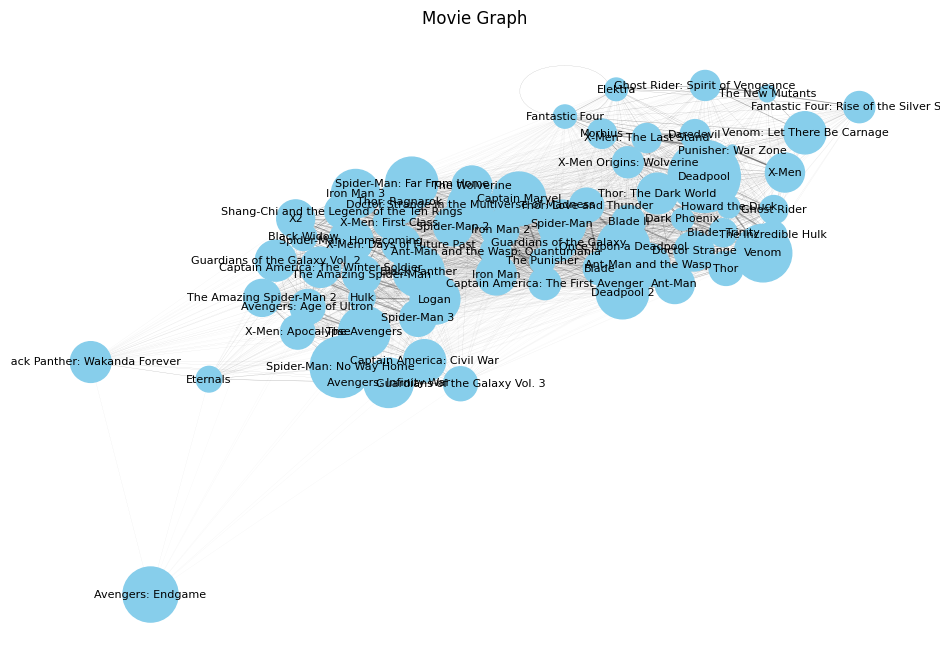

Node: Howard the Duck
Closeness Centrality: 0.9565217391304348
Betweenness Centrality: 0.00126620431320079

Node: Blade
Closeness Centrality: 0.9705882352941176
Betweenness Centrality: 0.0015519262079041218

Node: X-Men
Closeness Centrality: 0.88
Betweenness Centrality: 0.0006898324681260551

Node: Blade II
Closeness Centrality: 0.9565217391304348
Betweenness Centrality: 0.0015445262005041145

Node: Spider-Man
Closeness Centrality: 0.9850746268656716
Betweenness Centrality: 0.001997583623027316

Node: Daredevil
Closeness Centrality: 0.88
Betweenness Centrality: 0.0006287070889332652

Node: X2
Closeness Centrality: 0.9428571428571428
Betweenness Centrality: 0.0017054825808787714

Node: Hulk
Closeness Centrality: 0.9166666666666666
Betweenness Centrality: 0.0010201389390662656

Node: The Punisher
Closeness Centrality: 0.9850746268656716
Betweenness Centrality: 0.001997583623027316

Node: Spider-Man 2
Closeness Centrality: 0.9850746268656716
Betweenness Centrality: 0.001997583623027316

N

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

# Add nodes with movie titles and node sizes as box office
for index, row in df.iterrows():
    movie_title = row['movie_name']
    box_office = row['Box office (in Million Dollars)']
    budget=row['Budget (in Million Dollars)']
    score = row['Critic Score (from Rotten Tomatoes)']
    G.add_node(movie_title, size=100*score*box_office/budget, time=row['Time (in minutes)'])

# Define a budget threshold
time_threshold = 40 # Adjust this value according to your needs

# Calculate edge weights based on budget similarity and add edges to the graph
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        time_diff = abs(df.loc[i, 'Time (in minutes)'] - df.loc[j, 'Time (in minutes)'])
        if 0 < time_diff <= time_threshold:
            edge_weight = 1 / time_diff  # inverse of budget difference
            G.add_edge(df.loc[i, 'movie_name'], df.loc[j, 'movie_name'], weight=edge_weight)

# Get node sizes and edge weights
node_sizes = [G.nodes[node]['size']*2 for node in G.nodes()]
edge_weights = [G.edges[edge]['weight'] for edge in G.edges()]

# Draw the graph
plt.figure(figsize=(12, 8))                                                                                                                ##################### DURATION VS BOX OFFICE BAKIYO BU DA BENZER BUDGETLAR EDGE NODE SIZE BOX OFFICE  ##############################
pos = nx.spring_layout(G, k=0.3, iterations=50)  # Layout the graph nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='black', alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title('Movie Graph')
plt.axis('off')
plt.show()

# Calculate centrality measures
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Print the closeness centrality and betweenness centrality for each node
for node in G.nodes():
    print(f"Node: {node}")
    print(f"Closeness Centrality: {closeness_centrality[node]}")
    print(f"Betweenness Centrality: {betweenness_centrality[node]}")
    print()

 # Perform regression analysis
X = df['Time (in minutes)'] # Use budget as the independent variable
y = df['Box office (in Million Dollars)']  # Use box office as the dependent variable
X = sm.add_constant(X)  # Add a constant term to the independent variable

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

# Perform hypothesis test on the regression coefficient
coef = results.params['Time (in minutes)']
p_value = results.pvalues['Time (in minutes)']

print('Regression coefficient:', coef)
print('p-value:', p_value)
nx.write_gexf(G, 'time40.gexf')
files.download("time40.gexf")


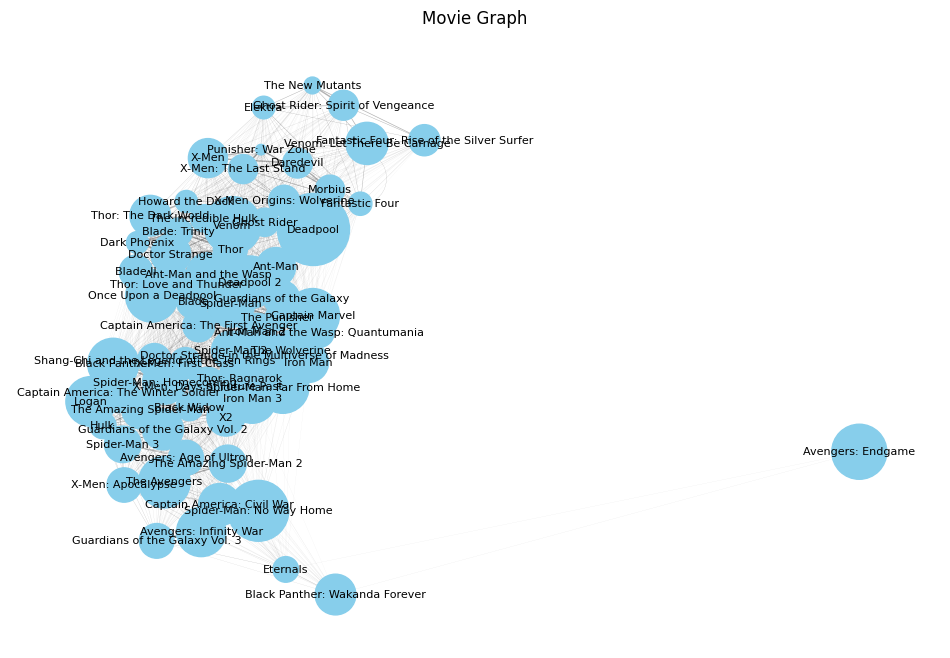

Node: Howard the Duck
Closeness Centrality: 0.8571428571428571
Betweenness Centrality: 0.0027310496212909494

Node: Blade
Closeness Centrality: 0.9428571428571428
Betweenness Centrality: 0.005872156354960956

Node: X-Men
Closeness Centrality: 0.7674418604651163
Betweenness Centrality: 0.0013804228033827558

Node: Blade II
Closeness Centrality: 0.8918918918918919
Betweenness Centrality: 0.004056202942991079

Node: Spider-Man
Closeness Centrality: 0.9428571428571428
Betweenness Centrality: 0.005872156354960956

Node: Daredevil
Closeness Centrality: 0.75
Betweenness Centrality: 0.001036009251889107

Node: X2
Closeness Centrality: 0.868421052631579
Betweenness Centrality: 0.004577129307864236

Node: Hulk
Closeness Centrality: 0.8354430379746836
Betweenness Centrality: 0.003005322596085132

Node: The Punisher
Closeness Centrality: 0.9295774647887324
Betweenness Centrality: 0.0048469493727558615

Node: Spider-Man 2
Closeness Centrality: 0.9295774647887324
Betweenness Centrality: 0.0051734906

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

# Add nodes with movie titles and node sizes as box office
for index, row in df.iterrows():
    movie_title = row['movie_name']
    box_office = row['Box office (in Million Dollars)']
    budget=row['Budget (in Million Dollars)']
    score = row['Critic Score (from Rotten Tomatoes)']
    G.add_node(movie_title, size=100*score*box_office/budget, time=row['Time (in minutes)'])

# Define a budget threshold
time_threshold = 30 # Adjust this value according to your needs

# Calculate edge weights based on budget similarity and add edges to the graph
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        time_diff = abs(df.loc[i, 'Time (in minutes)'] - df.loc[j, 'Time (in minutes)'])
        if 0 < time_diff <= time_threshold:
            edge_weight = 1 / time_diff  # inverse of budget difference
            G.add_edge(df.loc[i, 'movie_name'], df.loc[j, 'movie_name'], weight=edge_weight)

# Get node sizes and edge weights
node_sizes = [G.nodes[node]['size']*2 for node in G.nodes()]
edge_weights = [G.edges[edge]['weight'] for edge in G.edges()]

# Draw the graph
plt.figure(figsize=(12, 8))                                                                                                                ##################### DURATION VS BOX OFFICE BAKIYO BU DA BENZER BUDGETLAR EDGE NODE SIZE BOX OFFICE  ##############################
pos = nx.spring_layout(G, k=0.3, iterations=50)  # Layout the graph nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='black', alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title('Movie Graph')
plt.axis('off')
plt.show()

# Calculate centrality measures
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Print the closeness centrality and betweenness centrality for each node
for node in G.nodes():
    print(f"Node: {node}")
    print(f"Closeness Centrality: {closeness_centrality[node]}")
    print(f"Betweenness Centrality: {betweenness_centrality[node]}")
    print()

 # Perform regression analysis
X = df['Time (in minutes)'] # Use budget as the independent variable
y = df['Box office (in Million Dollars)']  # Use box office as the dependent variable
X = sm.add_constant(X)  # Add a constant term to the independent variable

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

# Perform hypothesis test on the regression coefficient
coef = results.params['Time (in minutes)']
p_value = results.pvalues['Time (in minutes)']

print('Regression coefficient:', coef)
print('p-value:', p_value)
nx.write_gexf(G, 'time30.gexf')
files.download("time30.gexf")


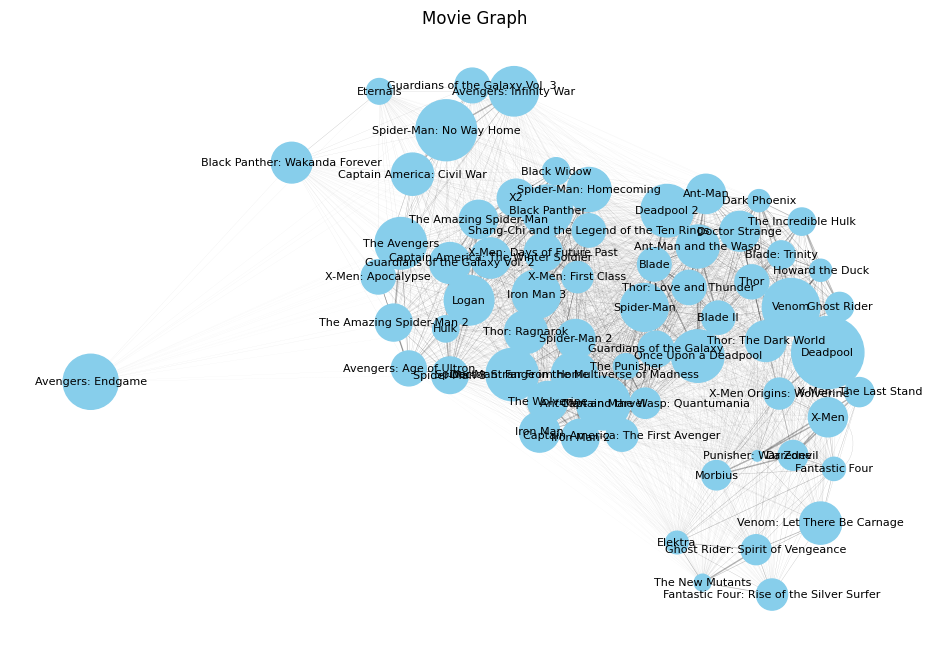

Node: Howard the Duck
Closeness Centrality: 0.9850746268656716
Betweenness Centrality: 0.0005843471660217144

Node: Blade
Closeness Centrality: 0.9850746268656716
Betweenness Centrality: 0.0005843471660217144

Node: X-Men
Closeness Centrality: 0.9295774647887324
Betweenness Centrality: 0.0003377215074182146

Node: Blade II
Closeness Centrality: 0.9705882352941176
Betweenness Centrality: 0.0005770627837373321

Node: Spider-Man
Closeness Centrality: 0.9850746268656716
Betweenness Centrality: 0.0005843471660217144

Node: Daredevil
Closeness Centrality: 0.9428571428571428
Betweenness Centrality: 0.00035313003684049333

Node: X2
Closeness Centrality: 0.9705882352941176
Betweenness Centrality: 0.0014234388706480566

Node: Hulk
Closeness Centrality: 1.0
Betweenness Centrality: 0.0014452920175012033

Node: The Punisher
Closeness Centrality: 0.9850746268656716
Betweenness Centrality: 0.0005843471660217144

Node: Spider-Man 2
Closeness Centrality: 0.9850746268656716
Betweenness Centrality: 0.000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

# Add nodes with movie titles and node sizes as box office
for index, row in df.iterrows():
    movie_title = row['movie_name']
    box_office = row['Box office (in Million Dollars)']
    budget=row['Budget (in Million Dollars)']
    score = row['Critic Score (from Rotten Tomatoes)']
    G.add_node(movie_title, size=100*box_office/budget, time=row['Time (in minutes)'])

# Define a budget threshold
time_threshold = 50 # Adjust this value according to your needs

# Calculate edge weights based on budget similarity and add edges to the graph
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        time_diff = abs(df.loc[i, 'Time (in minutes)'] - df.loc[j, 'Time (in minutes)'])
        if 0 < time_diff <= time_threshold:
            edge_weight = 1 / time_diff  # inverse of budget difference
            G.add_edge(df.loc[i, 'movie_name'], df.loc[j, 'movie_name'], weight=edge_weight)

# Get node sizes and edge weights
node_sizes = [G.nodes[node]['size']*2 for node in G.nodes()]
edge_weights = [G.edges[edge]['weight'] for edge in G.edges()]

# Draw the graph
plt.figure(figsize=(12, 8))                                                                                                                ##################### DURATION VS BOX OFFICE BAKIYO BU DA BENZER BUDGETLAR EDGE NODE SIZE BOX OFFICE  ##############################
pos = nx.spring_layout(G, k=0.3, iterations=50)  # Layout the graph nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='black', alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title('Movie Graph')
plt.axis('off')
plt.show()

# Calculate centrality measures
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Print the closeness centrality and betweenness centrality for each node
for node in G.nodes():
    print(f"Node: {node}")
    print(f"Closeness Centrality: {closeness_centrality[node]}")
    print(f"Betweenness Centrality: {betweenness_centrality[node]}")
    print()

 # Perform regression analysis
X = df['Time (in minutes)'] # Use budget as the independent variable
y = df['Box office (in Million Dollars)']  # Use box office as the dependent variable
X = sm.add_constant(X)  # Add a constant term to the independent variable

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

# Perform hypothesis test on the regression coefficient
coef = results.params['Time (in minutes)']
p_value = results.pvalues['Time (in minutes)']

print('Regression coefficient:', coef)
print('p-value:', p_value)
nx.write_gexf(G, 'time50.gexf')
files.download("time50.gexf")


ACTORS DENEME SECTION


In [ ]:
import requests
from bs4 import BeautifulSoup

# Send a GET request to the IMDB webpage
url = 'https://www.imdb.com/list/ls027954311/'
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the movie list container
movie_list_container = soup.find('div', class_='lister-list')

# Iterate over each movie item
for movie_item in movie_list_container.find_all('div', class_='lister-item'):
    # Extract movie name
    movie_name = movie_item.find('h3', class_='lister-item-header').a.text.strip()

    # Extract movie rating
    rating = movie_item.find('span', class_='ipl-rating-star__rating').text.strip()

    # Find the characters and their screen times
    character_elements = movie_item.find_all('p', class_='text-muted text-small')[1:]
    characters = []
    screen_times = []
    for element in character_elements:
        character = element.contents[0].strip()
        screen_time_element = element.find('span', class_='text-muted')
        screen_time = screen_time_element.contents[-1].strip() if screen_time_element else ""
        characters.append(character)
        screen_times.append(screen_time)

    # Print the extracted data
    print("Movie Name:", movie_name)
    print("Characters:", ', '.join(characters))
    print("Screen Times:", ', '.join(screen_times))
    print("Rating:", rating)
    print()


Movie Name: Iron Man
Characters: Director:, 
Screen Times: , Votes:
Rating: 7.9

Movie Name: The Incredible Hulk
Characters: Director:, 
Screen Times: , Votes:
Rating: 6.6

Movie Name: Iron Man 2
Characters: Director:, 
Screen Times: , Votes:
Rating: 6.9

Movie Name: Thor
Characters: Director:, 
Screen Times: , Votes:
Rating: 7

Movie Name: Captain America: The First Avenger
Characters: Director:, 
Screen Times: , Votes:
Rating: 6.9

Movie Name: Marvel One-Shot: The Consultant
Characters: Director:, 
Screen Times: , Votes:
Rating: 6.4

Movie Name: Marvel One-Shot: A Funny Thing Happened on the Way to Thor's Hammer
Characters: Director:, 
Screen Times: , Votes:
Rating: 7.1

Movie Name: The Avengers
Characters: Director:, 
Screen Times: , Votes:
Rating: 8

Movie Name: Marvel One-Shot: Item 47
Characters: Director:, 
Screen Times: , Votes:
Rating: 6.6

Movie Name: Iron Man Three
Characters: Director:, 
Screen Times: , Votes:
Rating: 7.1

Movie Name: Marvel One-Shot: Agent Carter
Character

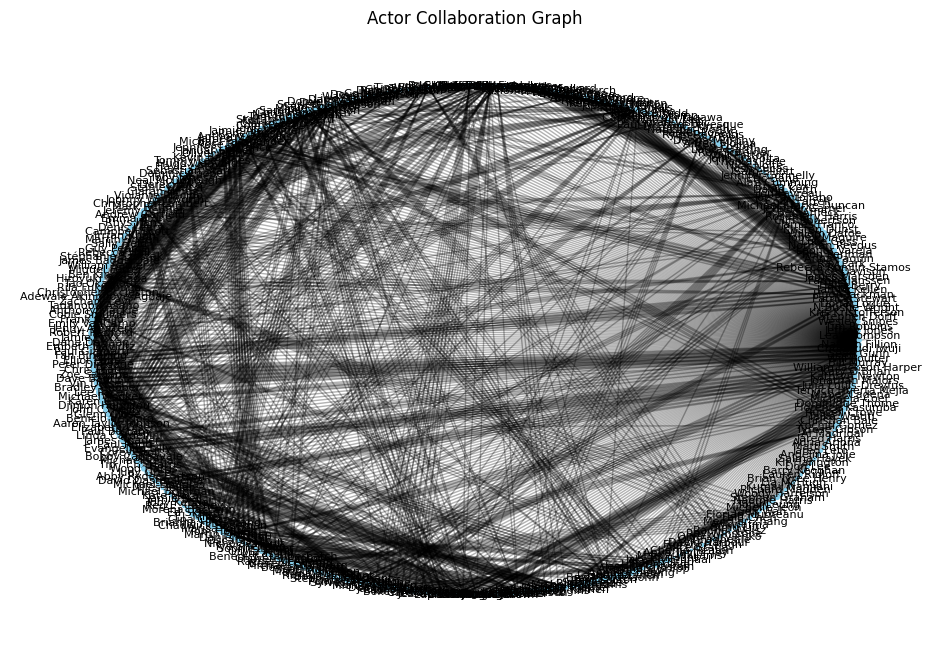

Actor: 
Closeness Centrality: 1.0
Betweenness Centrality: 0.8744839038418806
Degree Centrality: 1.0057471264367817
Clustering Coefficient: 0.037911159693928255

Actor: Lea Thompson
Closeness Centrality: 0.5021645021645021
Betweenness Centrality: 0.0
Degree Centrality: 0.008620689655172414
Clustering Coefficient: 1.0

Actor: Jeffrey Jones
Closeness Centrality: 0.5021645021645021
Betweenness Centrality: 0.0
Degree Centrality: 0.008620689655172414
Clustering Coefficient: 1.0

Actor: Tim Robbins
Closeness Centrality: 0.5021645021645021
Betweenness Centrality: 0.0
Degree Centrality: 0.008620689655172414
Clustering Coefficient: 1.0

Actor: Wesley Snipes
Closeness Centrality: 0.5110132158590308
Betweenness Centrality: 0.00029812183245553017
Degree Centrality: 0.04310344827586207
Clustering Coefficient: 0.4857142857142857

Actor: Stephen Dorff
Closeness Centrality: 0.5036179450072359
Betweenness Centrality: 0.0
Degree Centrality: 0.014367816091954023
Clustering Coefficient: 1.0

Actor: Kris Kr

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create a graph object
G = nx.Graph()

# Iterate over each movie and its starrings
for index, row in df.iterrows():
    movie_title = row['movie_name']
    actors = row['Starrings']
    box_office = row['Box office (in Million Dollars)']
    budget = row['Budget (in Million Dollars)']
    score = row['Critic Score (from Rotten Tomatoes)']

    for actor in actors:
        if actor not in G.nodes:
            G.add_node(actor, success=0, movie_count=0, size=0)

        if 'success' not in G.nodes[actor]:
            G.nodes[actor]['success'] = 0

        G.nodes[actor]['success'] += box_office/ budget

        if 'movie_count' not in G.nodes[actor]:
            G.nodes[actor]['movie_count'] = 0

        G.nodes[actor]['movie_count'] += 1

        if 'size' not in G.nodes[actor]:
            G.nodes[actor]['size'] = G.nodes[actor]['success'] / G.nodes[actor]['movie_count'] if G.nodes[actor]['movie_count'] > 0 else 0

        G.nodes[actor]['size'] = G.nodes[actor]['success'] / G.nodes[actor]['movie_count']

    # Connect the actors who collaborated in the movie and calculate the edge weights
    for i in range(len(actors)):
        for j in range(i + 1, len(actors)):
            actor1 = actors[i]
            actor2 = actors[j]

            if G.has_edge(actor1, actor2):
                edge_weight = 1 / (box_office / budget)
                G[actor1][actor2]['success'] += edge_weight
                G[actor1][actor2]['movie_count'] += 1
                G[actor1][actor2]['weight'] = G[actor1][actor2]['success'] / G[actor1][actor2]['movie_count']
            else:
                edge_weight = 1 / (box_office / budget)
                G.add_edge(actor1, actor2, weight= edge_weight, movie_count=1, success= edge_weight)

    # Add each actor as a node and update their movie count and success


# Calculate the success rate and node sizes
node_sizes = [G.nodes[actor]['success'] / G.nodes[actor]['movie_count'] if G.nodes[actor]['movie_count'] > 0 else 0 for actor in G.nodes()]


# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=[v * 2 for v in node_sizes], node_color='skyblue')
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title('Actor Collaboration Graph')
plt.axis('off')
plt.show()

# Calculate centrality measures
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
degree_centrality = nx.degree_centrality(G)
clustering_coefficient = nx.clustering(G)

# Print the centrality measures for each actor
for actor in G.nodes():
    print(f"Actor: {actor}")
    print(f"Closeness Centrality: {closeness_centrality[actor]}")
    print(f"Betweenness Centrality: {betweenness_centrality[actor]}")
    print(f"Degree Centrality: {degree_centrality[actor]}")
    print(f"Clustering Coefficient: {clustering_coefficient[actor]}")
    print()

# Perform regression analysis
X = df[['Budget (in Million Dollars)']]  # Use budget as the independent variable
y = df['Box office (in Million Dollars)']  # Use box office as the dependent variable
X = sm.add_constant(X)  # Add a constant term to the independent variable

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

# Perform hypothesis test on the regression coefficient
coef = results.params['Budget (in Million Dollars)']
p_value = results.pvalues['Budget (in Million Dollars)']

print('Regression coefficient:', coef)
print('p-value:', p_value)

nx.write_gexf(G, "actor_collaboration.gexf")
files.download("actor_collaboration.gexf")


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.collections
import math

# Create a graph object
G = nx.Graph()

# Iterate over each movie and its starrings
for index, row in df.iterrows():
    movie_title = row['movie_name']
    actors = row['Starrings']
    box_office = row['Box office (in Million Dollars)']
    budget = row['Budget (in Million Dollars)']
    score = row['Critic Score (from Rotten Tomatoes)']

    # Connect the actors who collaborated in the movie
    for i in range(len(actors)):
        for j in range(i + 1, len(actors)):
            actor1 = actors[i]
            actor2 = actors[j]

            # Check if the edge already exists
            if G.has_edge(actor1, actor2):
                # Update the weight of the edge based on the average success rate
                G[actor1][actor2]['weight'] += box_office * score / budget
                G[actor1][actor2]['count'] += 1
            else:
                # Create a new edge with initial weight and count
                G.add_edge(actor1, actor2, weight=box_office * score / budget, count=1)

    # Add each actor as a node and update their success rate and movie count
    for actor in actors:
        if actor not in G.nodes:
            G.add_node(actor, success=0, movie_count=0, size=0)

        if 'success' not in G.nodes[actor]:
            G.nodes[actor]['success'] = 0

        if 'movie_count' not in G.nodes[actor]:
            G.nodes[actor]['movie_count'] = 0

        G.nodes[actor]['success'] += box_office * score / budget
        G.nodes[actor]['movie_count'] += 1

# Calculate the average success rate for each actor
for actor in G.nodes:
    success_rate = G.nodes[actor]['success'] / G.nodes[actor]['movie_count'] if G.nodes[actor]['movie_count'] > 0 else 0
    G.nodes[actor]['size'] = success_rate

# Calculate the average success rate for each collaboration
for actor1, actor2, data in G.edges(data=True):
    weight = data['weight'] / data['count'] if data['count'] > 0 else 0
    G[actor1][actor2]['weight'] = weight

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.15, iterations=50)
node_sizes = [G.nodes[node]['size'] for node in G.nodes()]
edge_widths = [2 * G[actor1][actor2]['weight'] for actor1, actor2, _ in G.edges(data=True)]

# Plot nodes
for node, (x, y) in pos.items():
    size = G.nodes[node]['size']
    plt.scatter(x, y, s=size * 100, color='skyblue')

# Plot edges
for (actor1, actor2), width in zip(G.edges(), edge_widths):
    x1, y1 = pos[actor1]
    x2, y2 = pos[actor2]
    plt.plot([x1, x2], [y1, y2], color='black', linewidth=width, alpha=0.3)

# Plot labels
for node, (x, y) in pos.items():
    plt.text(x, y, node, fontsize=8, ha='center', va='center')

plt.title('Actor Collaboration Graph')
plt.axis('off')
plt.show()


ValueError: ignored

<Figure size 1200x800 with 1 Axes>

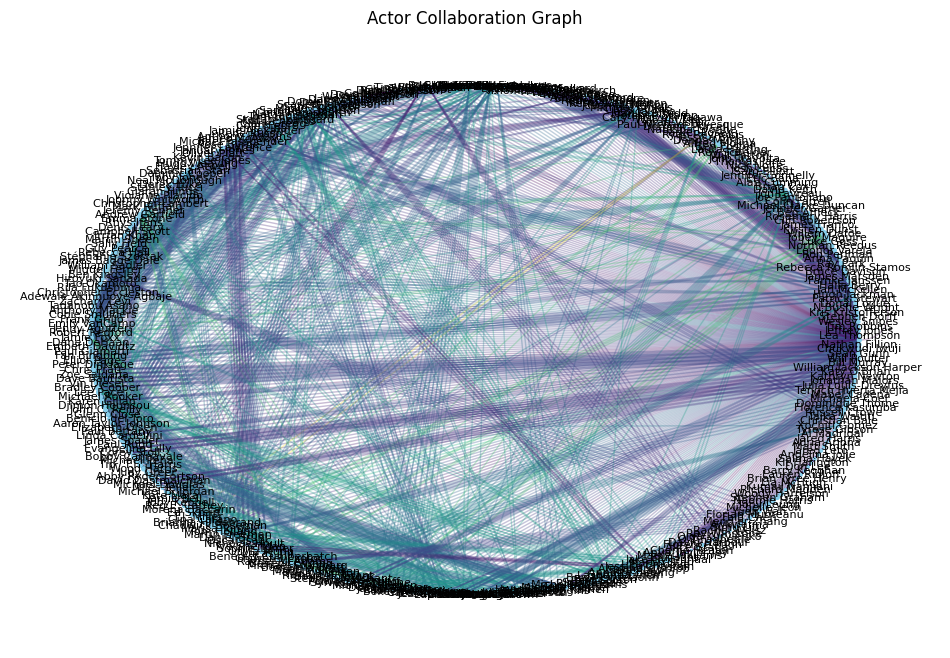

Actor: 
Closeness Centrality: 1.0
Betweenness Centrality: 0.8744839038418806
Degree Centrality: 1.0057471264367817
Clustering Coefficient: 0.037911159693928255

Actor: Lea Thompson
Closeness Centrality: 0.5021645021645021
Betweenness Centrality: 0.0
Degree Centrality: 0.008620689655172414
Clustering Coefficient: 1.0

Actor: Jeffrey Jones
Closeness Centrality: 0.5021645021645021
Betweenness Centrality: 0.0
Degree Centrality: 0.008620689655172414
Clustering Coefficient: 1.0

Actor: Tim Robbins
Closeness Centrality: 0.5021645021645021
Betweenness Centrality: 0.0
Degree Centrality: 0.008620689655172414
Clustering Coefficient: 1.0

Actor: Wesley Snipes
Closeness Centrality: 0.5110132158590308
Betweenness Centrality: 0.00029812183245553017
Degree Centrality: 0.04310344827586207
Clustering Coefficient: 0.4857142857142857

Actor: Stephen Dorff
Closeness Centrality: 0.5036179450072359
Betweenness Centrality: 0.0
Degree Centrality: 0.014367816091954023
Clustering Coefficient: 1.0

Actor: Kris Kr

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create a graph object
G = nx.Graph()

# Iterate over each movie and its starrings
for index, row in df.iterrows():
    movie_title = row['movie_name']
    actors = row['Starrings']
    box_office = row['Box office (in Million Dollars)']
    budget = row['Budget (in Million Dollars)']
    score = row['Critic Score (from Rotten Tomatoes)']

    # Add each actor as a node and update their movie count and success
    for actor in actors:
        if actor not in G.nodes:
            G.add_node(actor, success=0, movie_count=0, size=0)

        if 'success' not in G.nodes[actor]:
            G.nodes[actor]['success'] = 0

        G.nodes[actor]['success'] += box_office / budget

        if 'movie_count' not in G.nodes[actor]:
            G.nodes[actor]['movie_count'] = 0

        G.nodes[actor]['movie_count'] += 1

        if 'size' not in G.nodes[actor]:
            G.nodes[actor]['size'] = G.nodes[actor]['success'] / G.nodes[actor]['movie_count']

        G.nodes[actor]['size'] = G.nodes[actor]['success'] / G.nodes[actor]['movie_count']
    # Connect the actors who collaborated in the movie and calculate the edge weights
    for i in range(len(actors)):
        for j in range(i + 1, len(actors)):
            actor1 = actors[i]
            actor2 = actors[j]

            if G.has_edge(actor1, actor2):
                edge_weight = G[actor1][actor2]['weight']
                num_collaborations = G[actor1][actor2]['num_collaborations']
                avg_movie_success = G[actor1][actor2]['avg_movie_success']

                new_weight = (num_collaborations * avg_movie_success + (box_office / budget)) / (num_collaborations + 1)
                G[actor1][actor2]['weight'] = new_weight
                G[actor1][actor2]['num_collaborations'] += 1
            else:
                G.add_edge(actor1, actor2, weight=(box_office / budget), num_collaborations=1, avg_movie_success = (box_office / budget) / num_collaborations )

# Calculate the success rate and node sizes
node_sizes = [G.nodes[actor]['success'] / G.nodes[actor]['movie_count'] if G.nodes[actor]['movie_count'] > 0 else 0 for actor in G.nodes()]

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=[v * 2 for v in node_sizes], node_color='skyblue')
nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color=[G[actor1][actor2]['weight'] for actor1, actor2 in G.edges()])
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title('Actor Collaboration Graph')
plt.axis('off')
plt.show()

# Calculate centrality measures
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
degree_centrality = nx.degree_centrality(G)
clustering_coefficient = nx.clustering(G)

# Print the centrality measures for each actor
for actor in G.nodes():
    movie_count = G.nodes[actor]['movie_count']
    success_rate = G.nodes[actor]['success'] / movie_count if movie_count > 0 else 0
    G.nodes[actor]['size'] = success_rate
    print(f"Actor: {actor}")
    print(f"Closeness Centrality: {closeness_centrality[actor]}")
    print(f"Betweenness Centrality: {betweenness_centrality[actor]}")
    print(f"Degree Centrality: {degree_centrality[actor]}")
    print(f"Clustering Coefficient: {clustering_coefficient[actor]}")
    print()

# Perform regression analysis
X = df[['Budget (in Million Dollars)']]  # Use budget as the independent variable
y = df['Box office (in Million Dollars)']  # Use box office as the dependent variable
X = sm.add_constant(X)  # Add a constant term to the independent variable

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

# Perform hypothesis test on the regression coefficient
coef = results.params['Budget (in Million Dollars)']
p_value = results.pvalues['Budget (in Million Dollars)']

print('Regression coefficient:', coef)
print('p-value:', p_value)

nx.write_gexf(G, "actor_collaboration.gexf")
files.download("actor_collaboration.gexf")


In [ ]:
df.head(30)

NameError: ignored